<a href="https://colab.research.google.com/github/arka57/Ted-Talk-Views-Prediction/blob/main/TedTalks_View_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**

Project Type - Regression\
Contribution - Individual

# **Project Summary**

# **Problem Statement**

# **Data Analysis**

In [ ]:
#importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from xgboost import XGBRegressor

plt.rcParams["figure.figsize"] = [30, 5]

In [ ]:
#Loading the data

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
cd MyDrive/Ted_Talks_Views_Prediction/

/gdrive/MyDrive/Ted_Talks_Views_Prediction


In [ ]:
ls

data_ted_talks.csv  model.pkl


In [ ]:
data=pd.read_csv('data_ted_talks.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
data.head(5)

talk_id                            title         speaker_1  \
0        1      Averting the climate crisis           Al Gore   
1       92  The best stats you've ever seen      Hans Rosling   
2        7                 Simplicity sells       David Pogue   
3       53              Greening the ghetto     Majora Carter   
4       66      Do schools kill creativity?  Sir Ken Robinson   

              all_speakers                                    occupations  \
0           {0: 'Al Gore'}                      {0: ['climate advocate']}   
1      {0: 'Hans Rosling'}  {0: ['global health expert; data visionary']}   
2       {0: 'David Pogue'}                  {0: ['technology columnist']}   
3     {0: 'Majora Carter'}    {0: ['activist for environmental justice']}   
4  {0: 'Sir Ken Robinson'}                    {0: ['author', 'educator']}   

                                      about_speakers     views recorded_date  \
0  {0: 'Nobel Laureate Al Gore focused the world’...   3523392    2006-02-25   
1  {0: 'In Hans Rosling’s hands, data sings. Glob...  14501685    2006-02-22   
2  {0: 'David Pogue is the personal technology co...   1920832    2006-02-24   
3  {0: 'Majora Carter redefined the field of envi...   2664069    2006-02-26   
4  {0: "Creativity expert Sir Ken Robinson challe...  65051954    2006-02-25   

  published_date    event native_lang  \
0     2006-06-27  TED2006          en   
1     2006-06-27  TED2006          en   
2     2006-06-27  TED2006          en   
3     2006-06-27  TED2006          en   
4     2006-06-27  TED2006          en   

                                      available_lang  comments  duration  \
0  ['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...     272.0       977   
1  ['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...     628.0      1190   
2  ['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...     124.0      1286   
3  ['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...     219.0      1116   
4  ['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...    4931.0      1164   

                                              topics  \
0  ['alternative energy', 'cars', 'climate change...   
1  ['Africa', 'Asia', 'Google', 'demo', 'economic...   
2  ['computers', 'entertainment', 'interface desi...   
3  ['MacArthur grant', 'activism', 'business', 'c...   
4  ['children', 'creativity', 'culture', 'dance',...   

                                       related_talks  \
0  {243: 'New thinking on the climate crisis', 54...   
1  {2056: "Own your body's data", 2296: 'A visual...   
2  {1725: '10 top time-saving tech tips', 2274: '...   
3  {1041: '3 stories of local eco-entrepreneurshi...   
4  {865: 'Bring on the learning revolution!', 173...   

                                                 url  \
0  https://www.ted.com/talks/al_gore_averting_the...   
1  https://www.ted.com/talks/hans_rosling_the_bes...   
2  https://www.ted.com/talks/david_pogue_simplici...   
3  https://www.ted.com/talks/majora_carter_greeni...   
4  https://www.ted.com/talks/sir_ken_robinson_do_...   

                                         description  \
0  With the same humor and humanity he exuded in ...   
1  You've never seen data presented like this. Wi...   
2  New York Times columnist David Pogue takes aim...   
3  In an emotionally charged talk, MacArthur-winn...   
4  Sir Ken Robinson makes an entertaining and pro...   

                                          transcript  
0  Thank you so much, Chris. And it's truly a gre...  
1  About 10 years ago, I took on the task to teac...  
2  (Music: "The Sound of Silence," Simon & Garfun...  
3  If you're here today — and I'm very happy that...  
4  Good morning. How are you? (Audience) Good. It...

In [ ]:
data.describe()

talk_id         views     comments     duration
count   4005.000000  4.005000e+03  3350.000000  4005.000000
mean   12432.538327  2.148006e+06   161.997015   724.011236
std    17447.576262  3.451226e+06   268.838922   361.775462
min        1.000000  0.000000e+00     0.000000    60.000000
25%     1252.000000  8.820690e+05    38.000000   393.000000
50%     2333.000000  1.375508e+06    89.000000   738.000000
75%    23777.000000  2.133110e+06   188.000000   974.000000
max    62794.000000  6.505195e+07  6449.000000  3922.000000

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

# **Handling Missing Values**

In [ ]:
#percentage of null values per columns

In [ ]:
(data.isnull().sum()/len(data))*100

talk_id            0.000000
title              0.000000
speaker_1          0.000000
all_speakers       0.099875
occupations       13.033708
about_speakers    12.559301
views              0.000000
recorded_date      0.024969
published_date     0.000000
event              0.000000
native_lang        0.000000
available_lang     0.000000
comments          16.354557
duration           0.000000
topics             0.000000
related_talks      0.000000
url                0.000000
description        0.000000
transcript         0.000000
dtype: float64

In [ ]:
#As only 6 rows with 0 views. Removing them

In [ ]:
data=data[data['views']>0]

In [ ]:
#Columns with significant amount of null values--occupation,about_speakers,comments.
#occupation,about_speakers-categorical
#comments-numerical

#recorded_date,all speakers--negligible amount of null values

In [ ]:
#handling null for occupation
for index, row in data.iterrows():
    if pd.isnull(row['occupations']):
        data['occupations'][index] = str({0:'Other'})

<ipython-input-16-9c5f59874abe>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['occupations'][index] = str({0:'Other'})


In [ ]:
data[['occupations']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 0 to 4003
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   occupations  3999 non-null   object
dtypes: object(1)
memory usage: 191.5+ KB


In [ ]:

#For null values in about speakers-replacing them with NA 

In [ ]:

data['about_speakers'].fillna('NA',inplace=True)


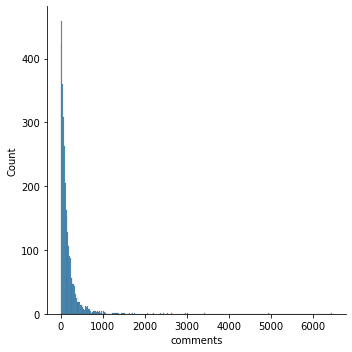

In [ ]:
sns.displot(data['comments'])

In [ ]:
#comment is a numerical varible with lot of skewing

In [ ]:
#For null values in columns --replacing them with extreme values-0

In [ ]:
data['comments'].fillna(0,inplace=True)

In [ ]:
#Recorded_Date--only 1 such row. So Deleting that row

In [ ]:
data[data['recorded_date'].isnull()]

talk_id                                              title  \
3831    56629  The unpaid work that GDP ignores -- and why it...   

           speaker_1           all_speakers         occupations  \
3831  Marilyn Waring  {0: 'Marilyn Waring'}  {0: ['economist']}   

                                         about_speakers    views  \
3831  {0: 'Marilyn Waring advocates for a public pol...  1276272   

     recorded_date published_date             event native_lang  \
3831           NaN     2020-01-23  TEDxChristchurch          en   

                                         available_lang  comments  duration  \
3831  ['en', 'es', 'fr', 'it', 'ko', 'pt', 'tr', 'vi...      20.0      1039   

                                                 topics  \
3831  ['global development', 'development', 'social ...   

                                          related_talks  \
3831  {46582: 'Why governments should prioritize wel...   

                                                    url  \
3831  https://www.ted.com/talks/marilyn_waring_the_u...   

                                            description  \
3831  If you: do laundry, are (or have been) pregnan...   

                                             transcript  
3831  (In Maori: My mountain is Taupiri.) (Waikato i...

In [ ]:
#only 1 row is there--so can remove this row of data

In [ ]:
data=data[~data['recorded_date'].isnull()]

In [ ]:
len(data[data['recorded_date'].isnull()])

0

In [ ]:
data[data['all_speakers'].isnull()]

talk_id                                              title  \
2927    23418  How prefab homes can transform affordable housing   
3266    36384    Why we need to stop obsessing over World War II   
3290    36844           Why talent carries you further than fame   
3665    49223                     Are we living in a simulation?   

               speaker_1 all_speakers   occupations about_speakers    views  \
2927  Antón García-Abril          NaN  {0: 'Other'}             NA    14934   
3266          Keith Lowe          NaN  {0: 'Other'}             NA   103682   
3290     Maisie Williams          NaN  {0: 'Other'}             NA  3677746   
3665      Zohreh Davoudi          NaN  {0: 'Other'}             NA   485122   

     recorded_date published_date                   event native_lang  \
2927    2016-11-19     2018-09-04  TEDxYouth@Beaconstreet          en   
3266    2014-11-15     2019-03-01              TEDxAthens          en   
3290    2019-02-03     2019-03-11          TEDxManchester          en   
3665    2019-10-08     2019-10-08                  TED-Ed          en   

                                         available_lang  comments  duration  \
2927                                       ['en', 'es']       0.0       449   
3266                                 ['en', 'pt', 'sr']       0.0      1109   
3290  ['ar', 'de', 'el', 'en', 'es', 'fr', 'hu', 'pt...       0.0       982   
3665  ['ar', 'el', 'en', 'es', 'fa', 'fr', 'he', 'id...       0.0       249   

                                                 topics  \
2927  ['design', 'architecture', 'industrial design'...   
3266  ['war', 'history', 'society', 'future', 'globa...   
3290  ['art', 'entertainment', 'entrepreneur', 'tech...   
3665  ['TED-Ed', 'animation', 'education', 'technolo...   

                                          related_talks  \
2927  {1015: 'Creative houses from reclaimed stuff',...   
3266  {1999: 'Why veterans miss war', 1651: 'What I ...   
3290  {39192: 'Why medieval politics was nothing lik...   
3665  {26263: 'Does time exist?', 24106: 'How do you...   

                                                    url  \
2927  https://www.ted.com/talks/anton_garcia_abril_h...   
3266  https://www.ted.com/talks/keith_lowe_why_we_ne...   
3290  https://www.ted.com/talks/maisie_williams_why_...   
3665  https://www.ted.com/talks/zohreh_davoudi_are_w...   

                                            description  \
2927  When architect Antón García-Abril moved to Bos...   
3266  Why are we so obsessed with World War II? Hist...   
3290  You'd never know from her transformation into ...   
3665  All life on Earth— living and inanimate, micro...   

                                             transcript  
2927  Subtitle Provided by JUFE MOOC Studio M Subtit...  
3266  Hello everybody. Audience: Hello. Keith Lowe: ...  
3290  Hi. I'm Maisie Williams. And I'm kind of just ...  
3665  We live in a vast universe, on a small wet pla...

In [ ]:
#there are only four cases . there can be some relation between speaker1 and all speakers. So leave for now

# **Checking for duplicate data**

In [ ]:
data.duplicated().any()

False

In [ ]:
#No duplicate data is present

# **Analysing Dependent Variable-Views**

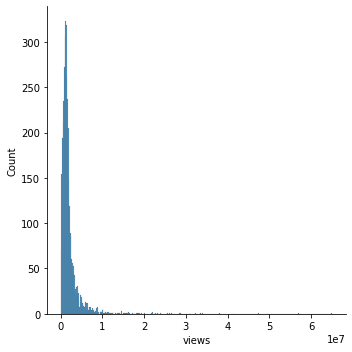

In [ ]:
sns.displot(data['views'])

In [ ]:
#We can see the dependent variable is moderately skewed. So will do transformation on it by applying log transformation

In [ ]:
data['views']=np.log10(data['views'])

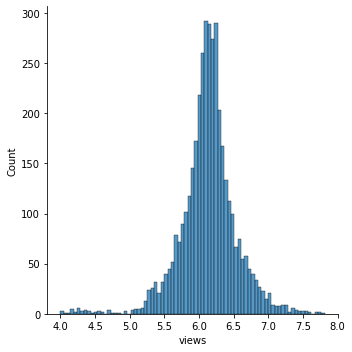

In [ ]:
sns.displot(data['views'])

In [ ]:
#Now there is nearly normal distribution among the values of views

# **Analysing Independent-Numerical variables**

In [ ]:
#Numerical variables--
#talk_id
#comments
#duration

In [ ]:
#talk_id-just identifier. So removing it

In [ ]:
data=data.drop('talk_id',axis=1)

# **Analysing -Comments**

In [ ]:
data['comments'].describe()

count    3998.000000
mean      135.735368
std       253.225922
min         0.000000
25%        17.000000
50%        68.000000
75%       162.750000
max      6449.000000
Name: comments, dtype: float64

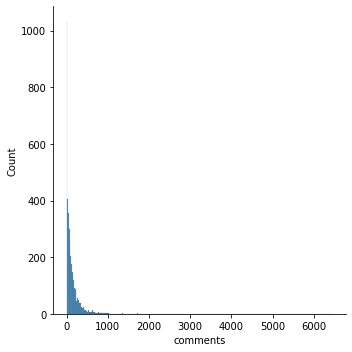

In [ ]:
sns.displot(data['comments'])

<AxesSubplot:xlabel='comments'>

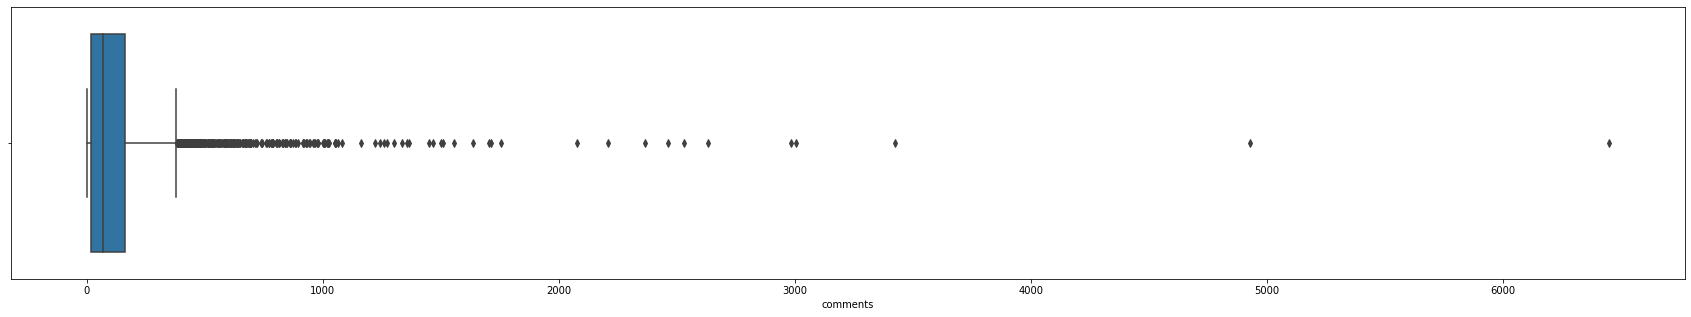

In [ ]:
sns.boxplot(x='comments',data=data)

In [ ]:
len(data[data['comments']<400])

3719

<AxesSubplot:xlabel='comments', ylabel='views'>

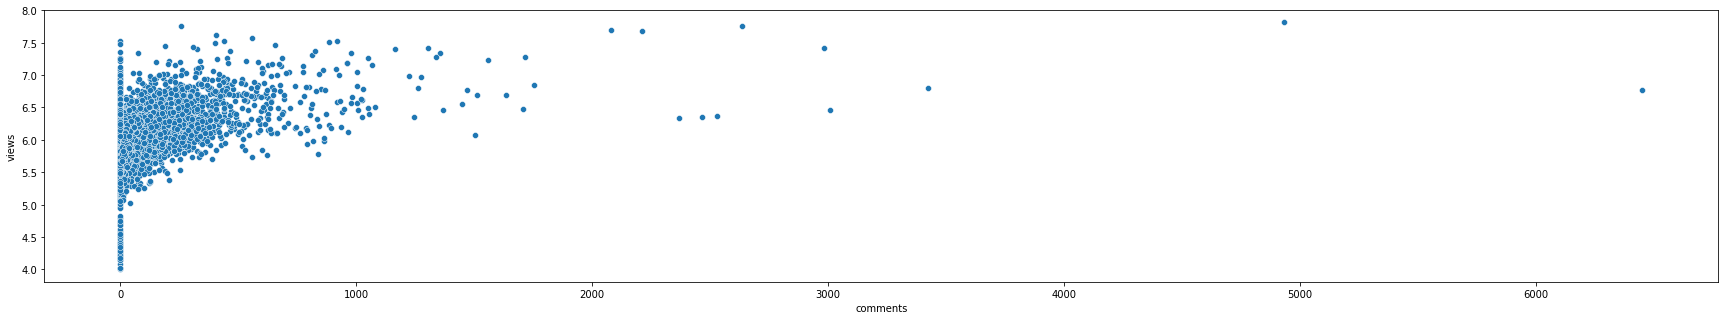

In [ ]:
sns.scatterplot(x='comments',y='views',data=data)

In [ ]:
#Coniserable number of outlier data is present. Hence treating outliers with median

In [ ]:
values=data.comments.quantile([0.25,0.75])
print(values)
iqr=values.values[1]-values.values[0]
min_limit=values.values[0]-1.5*iqr
max_limit=values.values[1]+1.5*iqr
data['comments']=data['comments'].apply(lambda x: x if x>min_limit and x<max_limit else data['comments'].median())

0.25     17.00
0.75    162.75
Name: comments, dtype: float64


<AxesSubplot:xlabel='comments'>

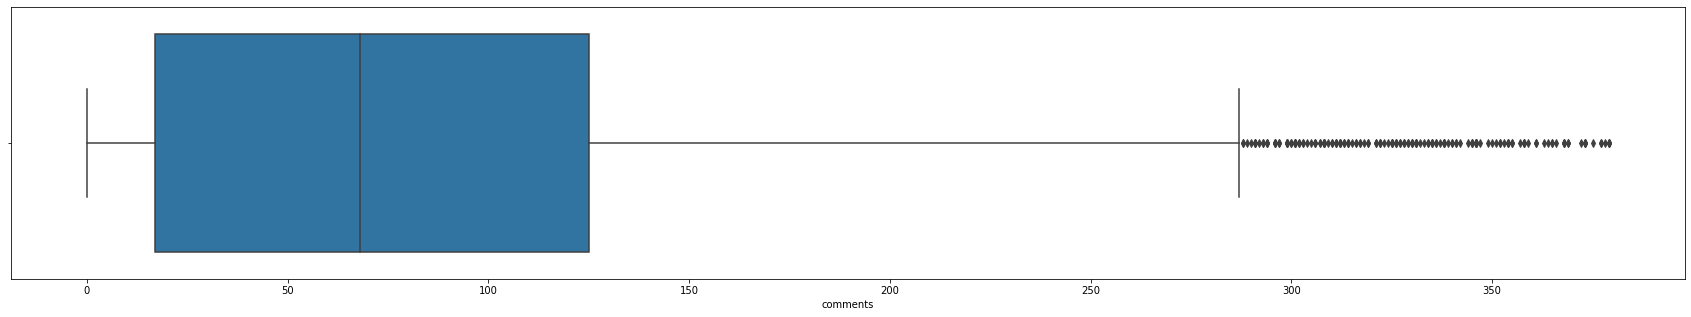

In [ ]:
sns.boxplot(x='comments',data=data)

<AxesSubplot:xlabel='comments', ylabel='views'>

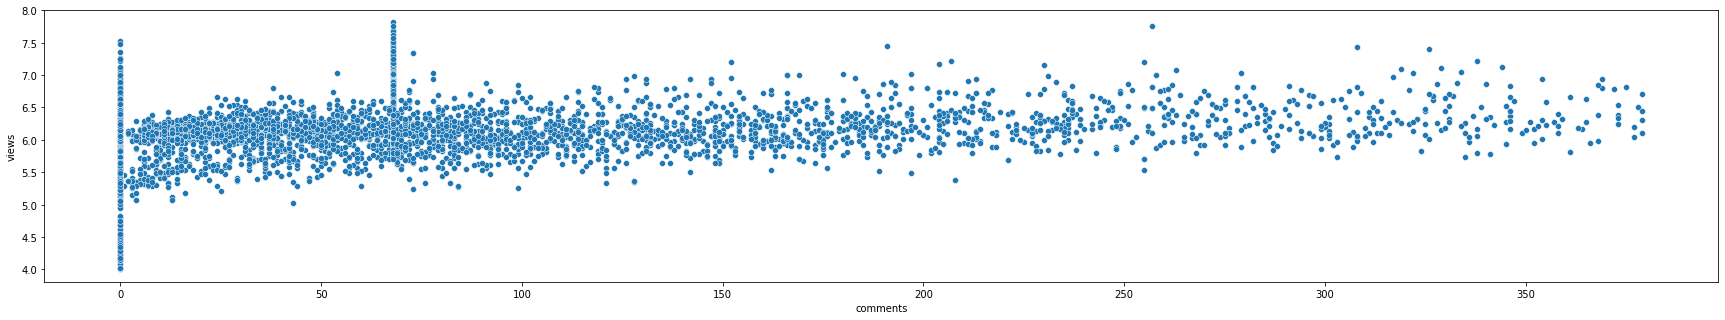

In [ ]:
sns.scatterplot(x='comments',y='views',data=data)

In [ ]:
#Very less but little correlation between comments and views

#Duration

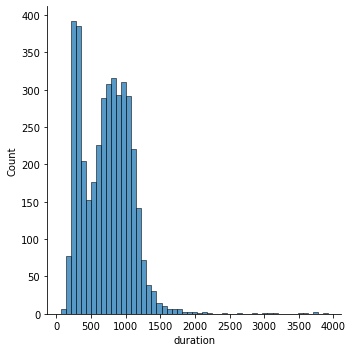

In [ ]:
sns.displot(data['duration'])

<AxesSubplot:xlabel='duration'>

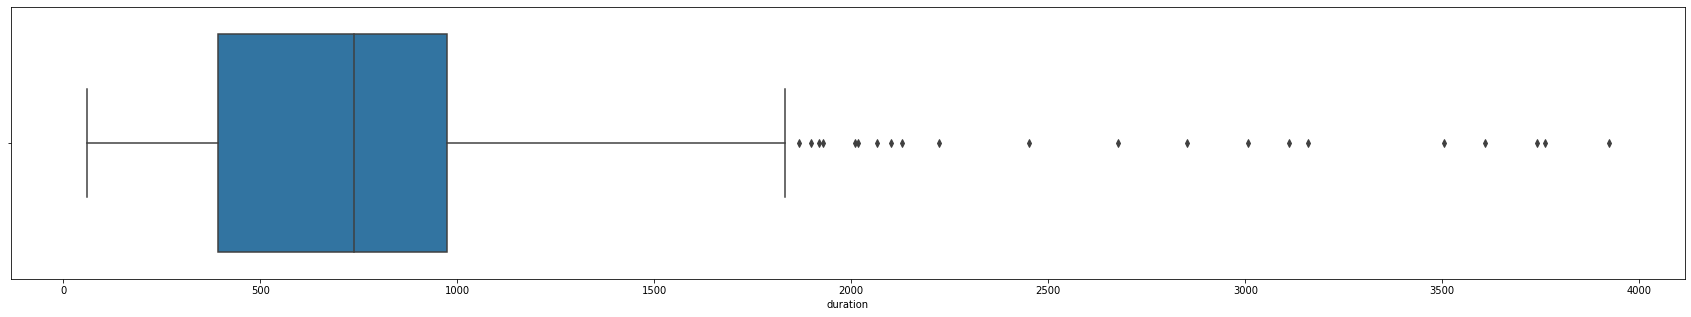

In [ ]:
sns.boxplot(x='duration',data=data)

In [ ]:
#Considerable number of outliers are present . Hence replacing them with median

In [ ]:
values=data.duration.quantile([0.25,0.75])
print(values)
iqr=values.values[1]-values.values[0]
min_limit=values.values[0]-1.5*iqr
max_limit=values.values[1]+1.5*iqr
data['duration']=data['duration'].apply(lambda x: x if x>min_limit and x<max_limit else data['duration'].median())

0.25    392.25
0.75    973.75
Name: duration, dtype: float64


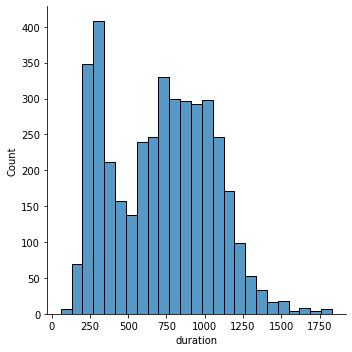

In [ ]:
sns.displot(data['duration'])

<AxesSubplot:xlabel='duration'>

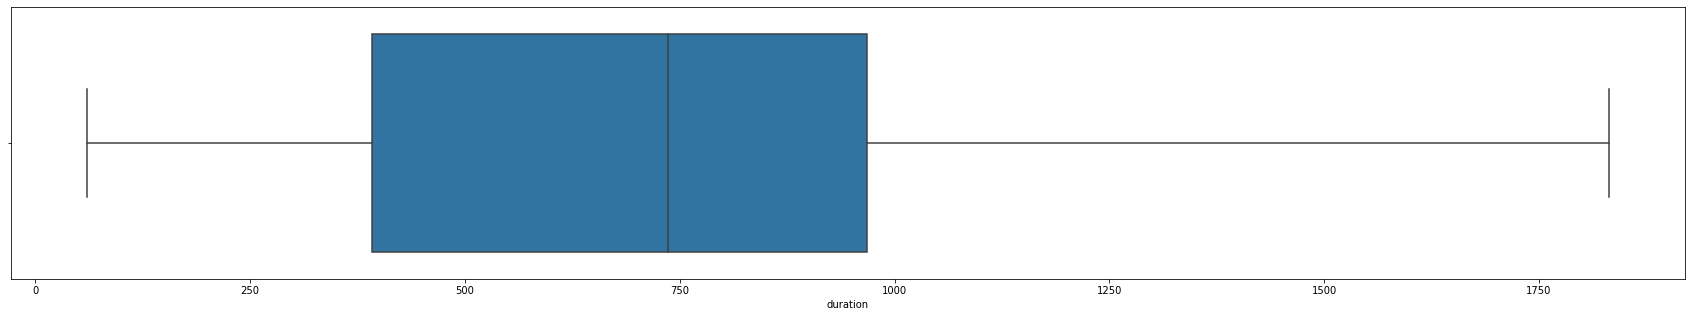

In [ ]:
sns.boxplot(x='duration',data=data)

<AxesSubplot:xlabel='duration', ylabel='views'>

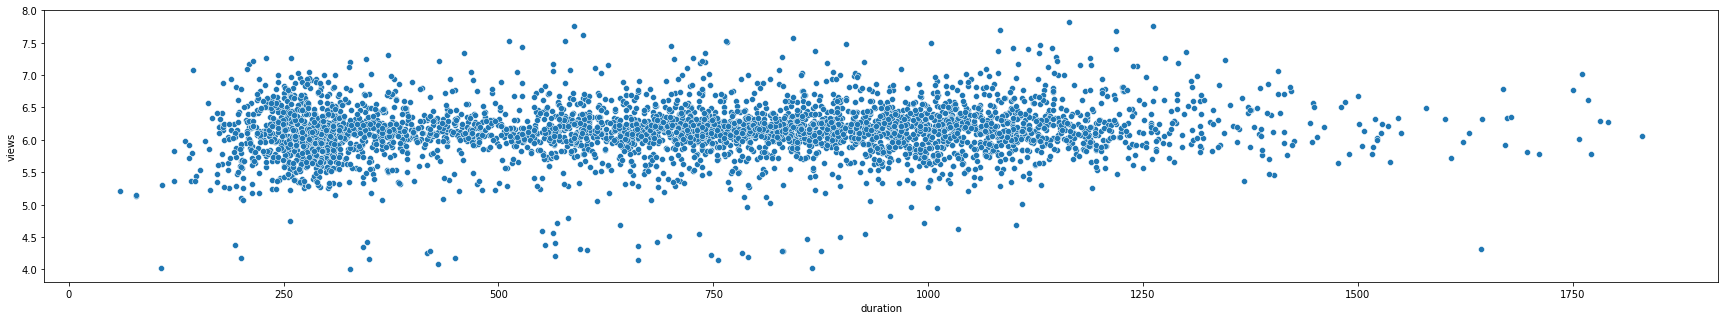

In [ ]:
sns.scatterplot(x='duration',y='views',data=data)

In [ ]:
#Little  observable linear trend between duration and views

# **Analysing Categorical Variable**

In [ ]:

#title,speaker_1,all_speakers,       
#occupations,about_speakers,recorded_date,published_date,event              
#native_lang,available_lang,comments,topics           
#related_talks,url,description,transcript         

In [ ]:
data.head(5)

title         speaker_1             all_speakers  \
0      Averting the climate crisis           Al Gore           {0: 'Al Gore'}   
1  The best stats you've ever seen      Hans Rosling      {0: 'Hans Rosling'}   
2                 Simplicity sells       David Pogue       {0: 'David Pogue'}   
3              Greening the ghetto     Majora Carter     {0: 'Majora Carter'}   
4      Do schools kill creativity?  Sir Ken Robinson  {0: 'Sir Ken Robinson'}   

                                     occupations  \
0                      {0: ['climate advocate']}   
1  {0: ['global health expert; data visionary']}   
2                  {0: ['technology columnist']}   
3    {0: ['activist for environmental justice']}   
4                    {0: ['author', 'educator']}   

                                      about_speakers     views recorded_date  \
0  {0: 'Nobel Laureate Al Gore focused the world’...  6.546961    2006-02-25   
1  {0: 'In Hans Rosling’s hands, data sings. Glob...  7.161418    2006-02-22   
2  {0: 'David Pogue is the personal technology co...  6.283489    2006-02-24   
3  {0: 'Majora Carter redefined the field of envi...  6.425545    2006-02-26   
4  {0: "Creativity expert Sir Ken Robinson challe...  7.813260    2006-02-25   

  published_date    event native_lang  \
0     2006-06-27  TED2006          en   
1     2006-06-27  TED2006          en   
2     2006-06-27  TED2006          en   
3     2006-06-27  TED2006          en   
4     2006-06-27  TED2006          en   

                                      available_lang  comments  duration  \
0  ['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...     272.0     977.0   
1  ['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...      68.0    1190.0   
2  ['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...     124.0    1286.0   
3  ['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...     219.0    1116.0   
4  ['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...      68.0    1164.0   

                                              topics  \
0  ['alternative energy', 'cars', 'climate change...   
1  ['Africa', 'Asia', 'Google', 'demo', 'economic...   
2  ['computers', 'entertainment', 'interface desi...   
3  ['MacArthur grant', 'activism', 'business', 'c...   
4  ['children', 'creativity', 'culture', 'dance',...   

                                       related_talks  \
0  {243: 'New thinking on the climate crisis', 54...   
1  {2056: "Own your body's data", 2296: 'A visual...   
2  {1725: '10 top time-saving tech tips', 2274: '...   
3  {1041: '3 stories of local eco-entrepreneurshi...   
4  {865: 'Bring on the learning revolution!', 173...   

                                                 url  \
0  https://www.ted.com/talks/al_gore_averting_the...   
1  https://www.ted.com/talks/hans_rosling_the_bes...   
2  https://www.ted.com/talks/david_pogue_simplici...   
3  https://www.ted.com/talks/majora_carter_greeni...   
4  https://www.ted.com/talks/sir_ken_robinson_do_...   

                                         description  \
0  With the same humor and humanity he exuded in ...   
1  You've never seen data presented like this. Wi...   
2  New York Times columnist David Pogue takes aim...   
3  In an emotionally charged talk, MacArthur-winn...   
4  Sir Ken Robinson makes an entertaining and pro...   

                                          transcript  
0  Thank you so much, Chris. And it's truly a gre...  
1  About 10 years ago, I took on the task to teac...  
2  (Music: "The Sound of Silence," Simon & Garfun...  
3  If you're here today — and I'm very happy that...  
4  Good morning. How are you? (Audience) Good. It...

In [ ]:
data['transcript'][0]

'Thank you so much, Chris. And it\'s truly a great honor to have the opportunity to come to this stage twice; I\'m extremely grateful. I have been blown away by this conference, and I want to thank all of you for the many nice comments about what I had to say the other night. And I say that sincerely, partly because (Mock sob) I need that. (Laughter) Put yourselves in my position. (Laughter) I flew on Air Force Two for eight years. (Laughter) Now I have to take off my shoes or boots to get on an airplane! (Laughter) (Applause) I\'ll tell you one quick story to illustrate what that\'s been like for me. (Laughter) It\'s a true story — every bit of this is true. Soon after Tipper and I left the — (Mock sob) White House — (Laughter) we were driving from our home in Nashville to a little farm we have 50 miles east of Nashville. Driving ourselves. (Laughter) I know it sounds like a little thing to you, but — (Laughter) I looked in the rear-view mirror and all of a sudden it just hit me. Ther

In [ ]:
#url,transcript--useless we can drop

In [ ]:
data=data.drop(['url','transcript'],axis=1)

In [ ]:
data.head(5)

title         speaker_1             all_speakers  \
0      Averting the climate crisis           Al Gore           {0: 'Al Gore'}   
1  The best stats you've ever seen      Hans Rosling      {0: 'Hans Rosling'}   
2                 Simplicity sells       David Pogue       {0: 'David Pogue'}   
3              Greening the ghetto     Majora Carter     {0: 'Majora Carter'}   
4      Do schools kill creativity?  Sir Ken Robinson  {0: 'Sir Ken Robinson'}   

                                     occupations  \
0                      {0: ['climate advocate']}   
1  {0: ['global health expert; data visionary']}   
2                  {0: ['technology columnist']}   
3    {0: ['activist for environmental justice']}   
4                    {0: ['author', 'educator']}   

                                      about_speakers     views recorded_date  \
0  {0: 'Nobel Laureate Al Gore focused the world’...  6.546961    2006-02-25   
1  {0: 'In Hans Rosling’s hands, data sings. Glob...  7.161418    2006-02-22   
2  {0: 'David Pogue is the personal technology co...  6.283489    2006-02-24   
3  {0: 'Majora Carter redefined the field of envi...  6.425545    2006-02-26   
4  {0: "Creativity expert Sir Ken Robinson challe...  7.813260    2006-02-25   

  published_date    event native_lang  \
0     2006-06-27  TED2006          en   
1     2006-06-27  TED2006          en   
2     2006-06-27  TED2006          en   
3     2006-06-27  TED2006          en   
4     2006-06-27  TED2006          en   

                                      available_lang  comments  duration  \
0  ['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...     272.0     977.0   
1  ['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...      68.0    1190.0   
2  ['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...     124.0    1286.0   
3  ['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...     219.0    1116.0   
4  ['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...      68.0    1164.0   

                                              topics  \
0  ['alternative energy', 'cars', 'climate change...   
1  ['Africa', 'Asia', 'Google', 'demo', 'economic...   
2  ['computers', 'entertainment', 'interface desi...   
3  ['MacArthur grant', 'activism', 'business', 'c...   
4  ['children', 'creativity', 'culture', 'dance',...   

                                       related_talks  \
0  {243: 'New thinking on the climate crisis', 54...   
1  {2056: "Own your body's data", 2296: 'A visual...   
2  {1725: '10 top time-saving tech tips', 2274: '...   
3  {1041: '3 stories of local eco-entrepreneurshi...   
4  {865: 'Bring on the learning revolution!', 173...   

                                         description  
0  With the same humor and humanity he exuded in ...  
1  You've never seen data presented like this. Wi...  
2  New York Times columnist David Pogue takes aim...  
3  In an emotionally charged talk, MacArthur-winn...  
4  Sir Ken Robinson makes an entertaining and pro...

# **Analysing the date columns-recorded_date and published_date**

In [ ]:
data['recorded_date']=pd.to_datetime(data['recorded_date'])
data['published_date']=pd.to_datetime(data['published_date'])

In [ ]:
#Creating new column days_old signifying range between recorded date and published date

In [ ]:
data['days_old']=(data['published_date']-data['recorded_date']).dt.days

In [ ]:
data.head(1)

title speaker_1    all_speakers  \
0  Averting the climate crisis   Al Gore  {0: 'Al Gore'}   

                 occupations  \
0  {0: ['climate advocate']}   

                                      about_speakers     views recorded_date  \
0  {0: 'Nobel Laureate Al Gore focused the world’...  6.546961    2006-02-25   

  published_date    event native_lang  \
0     2006-06-27  TED2006          en   

                                      available_lang  comments  duration  \
0  ['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...     272.0     977.0   

                                              topics  \
0  ['alternative energy', 'cars', 'climate change...   

                                       related_talks  \
0  {243: 'New thinking on the climate crisis', 54...   

                                         description  days_old  
0  With the same humor and humanity he exuded in ...       122

In [ ]:
len(data[data['days_old']<0])

17

In [ ]:
#there are 17 rows where days old <0. Not possible. So making recorded date and publishing date same

In [ ]:
def rectify_date(recorded_date,published_date,days_old):
    if(days_old<0):
        published_date=recorded_date
    return published_date    

In [ ]:
data['published_date']=data.apply(lambda x:rectify_date(x['recorded_date'],x['published_date'],x['days_old']),axis=1)

In [ ]:
#Doing once again day difference

In [ ]:
data['days_old1']=(data['published_date']-data['recorded_date']).dt.days

In [ ]:
len(data[data['days_old1']<0])

0

In [ ]:
data=data.drop('days_old',axis=1)

In [ ]:
#Creating columns of day_of_month,month,day_name,day_of_week(weekend or not)

In [ ]:
data['day']=data['published_date'].dt.day
data['month']=data['published_date'].dt.month
data['day_name']=data['published_date'].dt.day_name()

#for weekend value is 1 else 0;
data['is_weekend']=data['published_date'].dt.day_of_week
data['is_weekend']=data['is_weekend'].apply(lambda x: 1 if x>=5 else 0)

In [ ]:
data['year']=data['published_date'].dt.year

<AxesSubplot:xlabel='days_old1', ylabel='Count'>

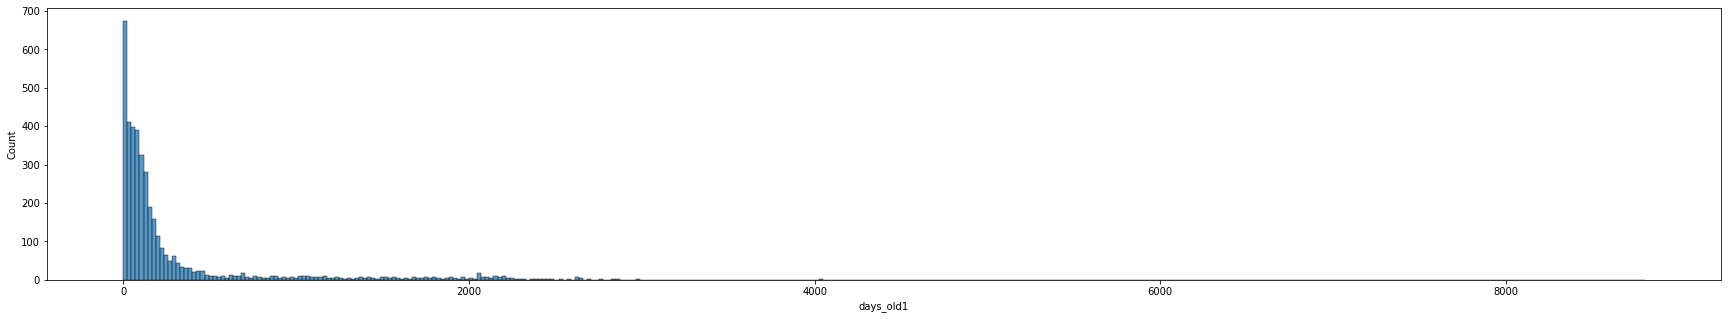

In [ ]:
sns.histplot(data['days_old1'])

<AxesSubplot:xlabel='days_old1', ylabel='views'>

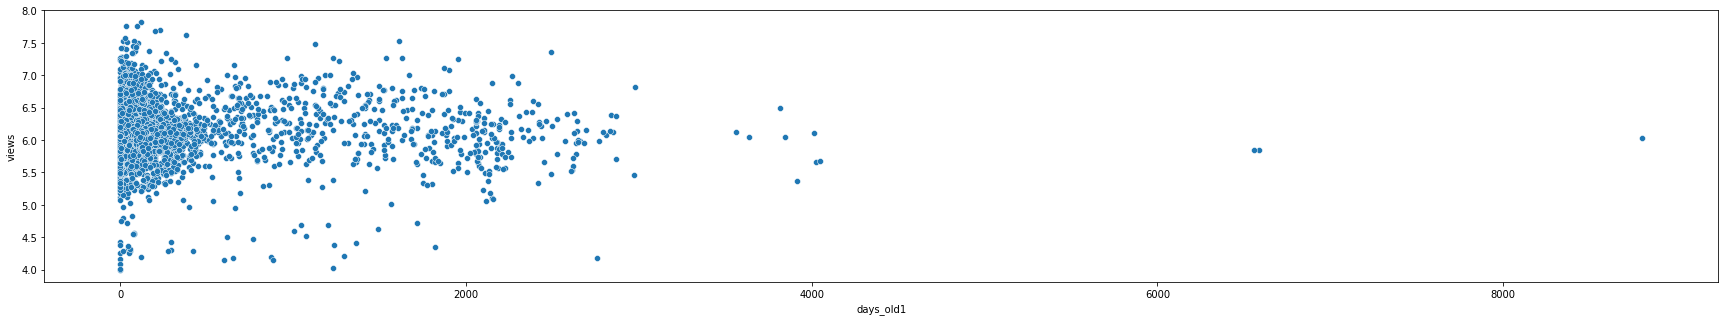

In [ ]:
sns.scatterplot(x='days_old1',y='views',data=data)


In [ ]:
data['days_old1'].describe()

count    3998.000000
mean      308.359430
std       582.078495
min         0.000000
25%        42.000000
50%       104.000000
75%       229.000000
max      8804.000000
Name: days_old1, dtype: float64

<AxesSubplot:xlabel='days_old1'>

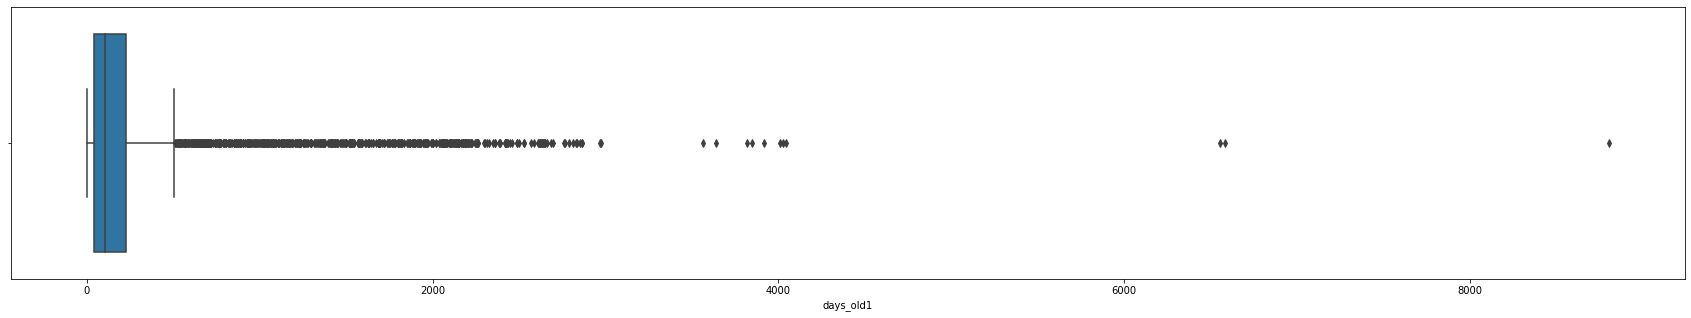

In [ ]:
sns.boxplot(x='days_old1',data=data)

In [ ]:
len(data[data['days_old1']>365])

694

In [ ]:
#Analysing more than 75% of data is around within year range. So making it a binary variable with 0 if day<365 else 1

In [ ]:
data['days_old2']=data['days_old1'].apply(lambda x: 0 if x<365 else 1)

<AxesSubplot:xlabel='days_old2', ylabel='count'>

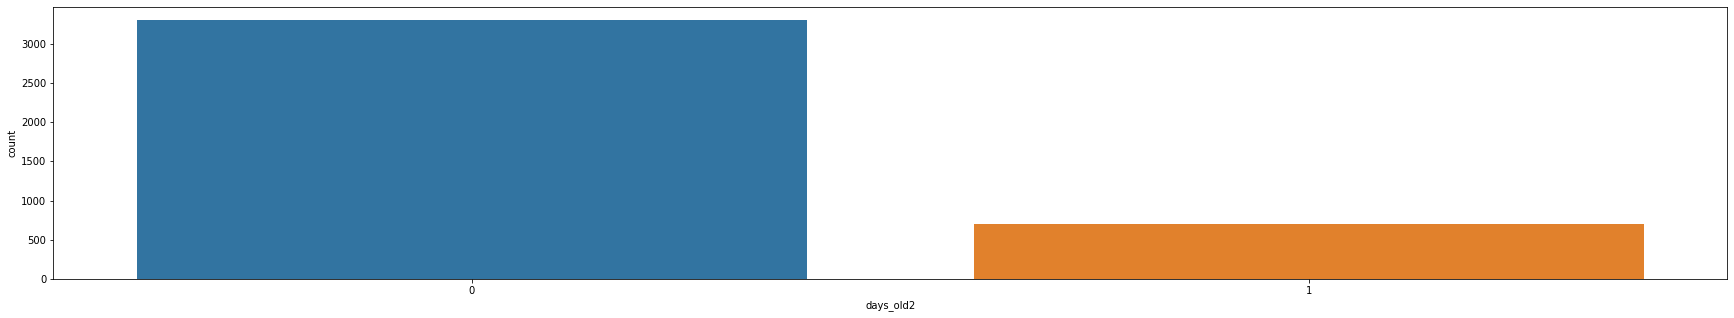

In [ ]:
sns.countplot(x='days_old2',data=data)

<AxesSubplot:xlabel='days_old2', ylabel='views'>

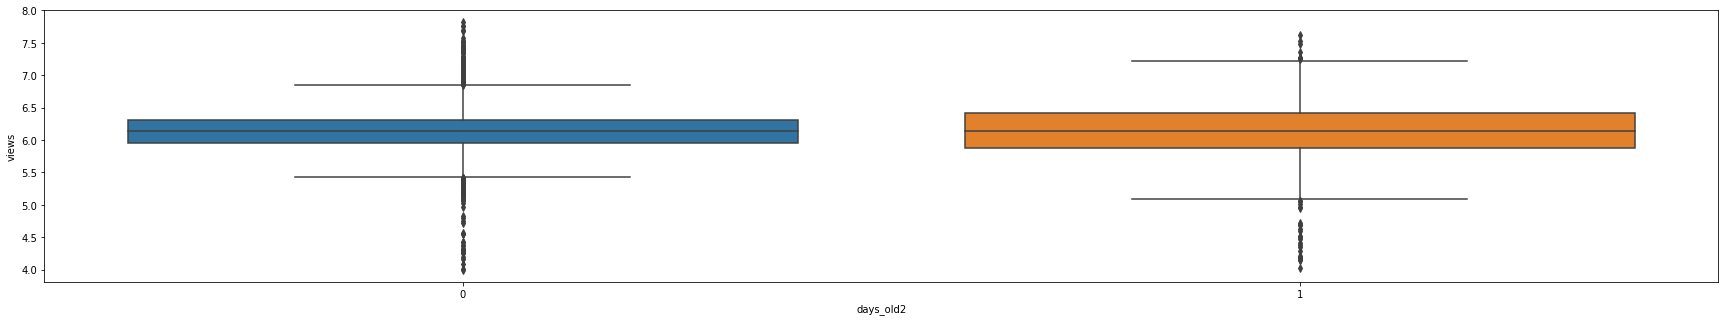

In [ ]:
sns.boxplot(x='days_old2',y='views',data=data)

In [ ]:
df=data[['days_old1','views']].groupby('days_old1').agg({'views':'median'})
df.reset_index(inplace=True)

In [ ]:
df1=data[['days_old1','views']].groupby('days_old1').agg({'views':'mean'})
df1.reset_index(inplace=True)

In [ ]:
df.head(1)

days_old1     views
0          0  5.829894

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   days_old1  916 non-null    int64  
 1   views      916 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 14.4 KB


<AxesSubplot:xlabel='days_old1', ylabel='views'>

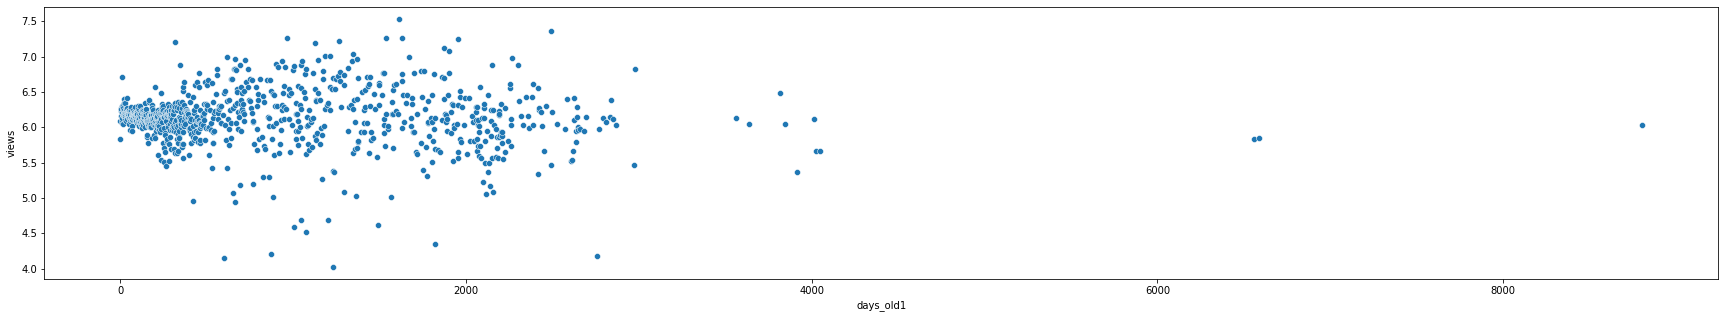

In [ ]:
sns.scatterplot(x='days_old1',y='views',data=df)

<AxesSubplot:xlabel='days_old1', ylabel='views'>

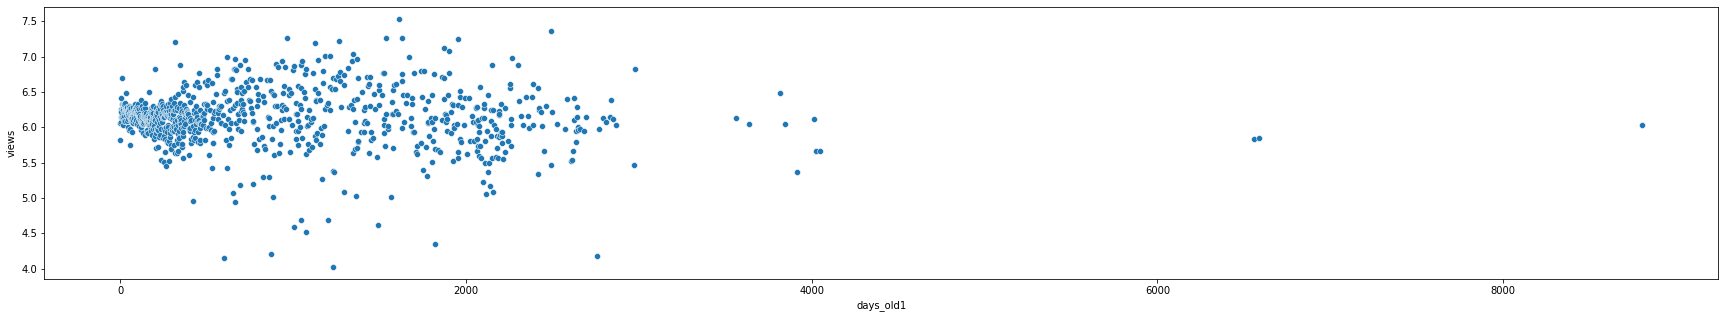

In [ ]:
sns.scatterplot(x='days_old1',y='views',data=df1)

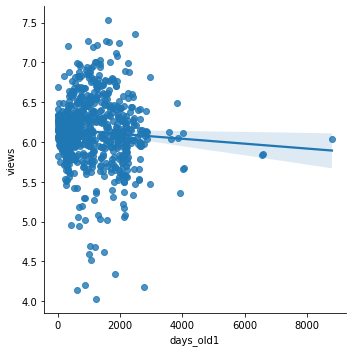

In [ ]:
sns.lmplot(x='days_old1',y='views',data=df1,fit_reg=True)

In [ ]:
#There may be a very slight linear correlation between days_old1 

In [ ]:
#Checking whether any relation between weekend and views of result

<AxesSubplot:xlabel='is_weekend', ylabel='views'>

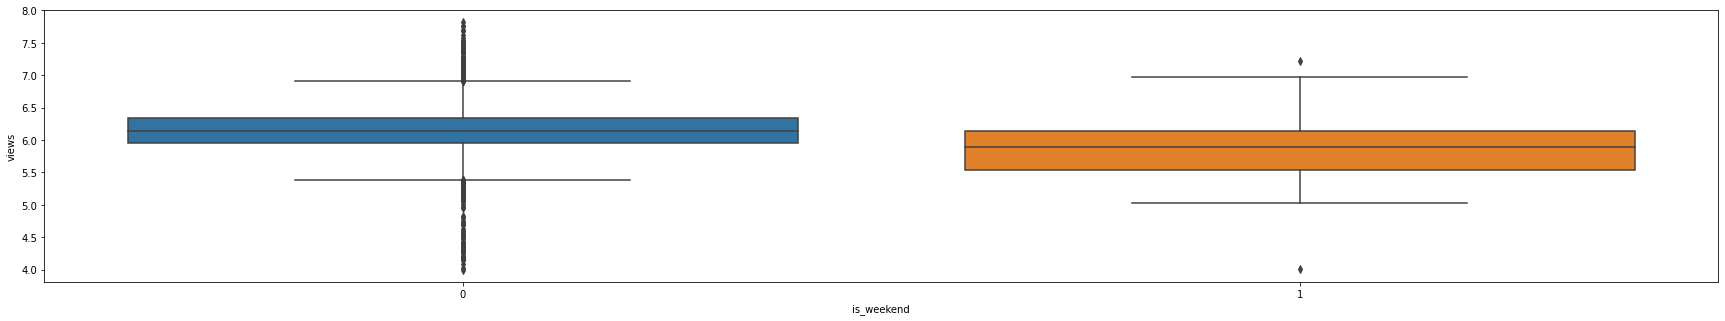

In [ ]:
sns.boxplot(x='is_weekend',y='views',data=data)

In [ ]:
#there are lot of outliers but still median views of videos released on weekdays has higher viewership

In [ ]:
df3=data[['views','is_weekend']].groupby('is_weekend').agg({'views':'median'})
df3.reset_index(inplace=True)

In [ ]:
df3.head()

is_weekend     views
0           0  6.144405
1           1  5.897907

<AxesSubplot:xlabel='is_weekend', ylabel='views'>

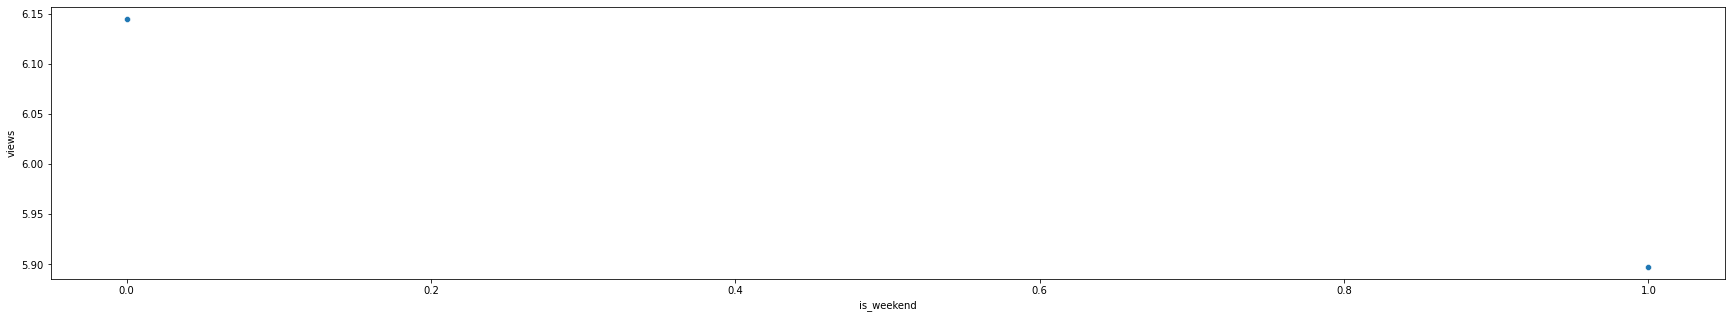

In [ ]:
sns.scatterplot(x='is_weekend',y='views',data=df3)

In [ ]:
data1=data.copy()

In [ ]:
data1[data1['is_weekend']==0]['views'].median()

6.144405126740722

In [ ]:
#Checking relation between month and views 

<AxesSubplot:xlabel='month', ylabel='views'>

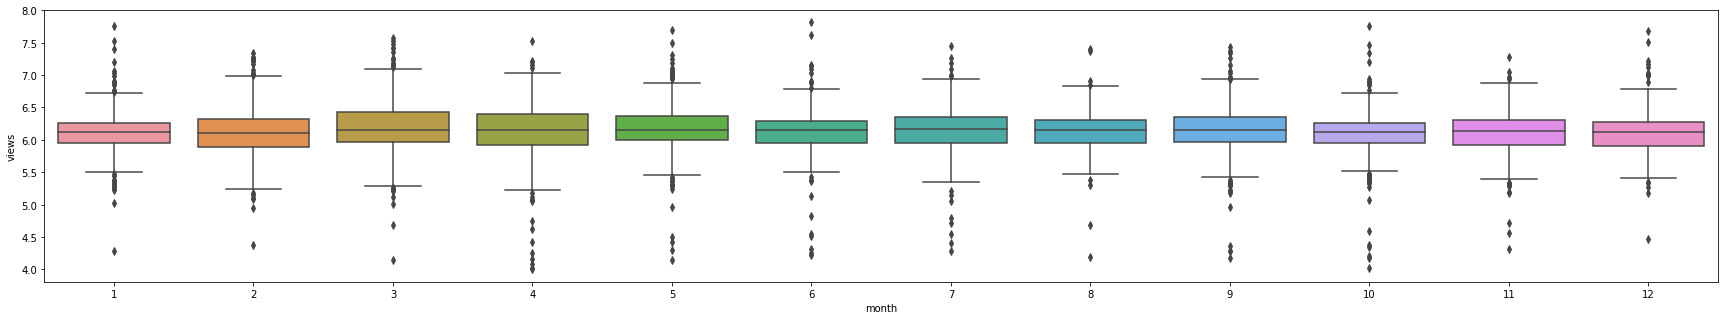

In [ ]:
sns.boxplot(x='month',y='views',data=data)

In [ ]:
df4=data[['month','views']].groupby('month').agg({'views':['median','mean','sum']})
df4.reset_index(inplace=True)

In [ ]:
df5=data[['month','views']].groupby('month').agg({'views':'median'})
df5.reset_index(inplace=True)

In [ ]:
df4.head(12)

month     views                       
            median      mean          sum
0      1  6.125156  6.113907  2115.411921
1      2  6.102573  6.105248  2515.362334
2      3  6.152938  6.186248  2592.037853
3      4  6.148677  6.139459  2584.712414
4      5  6.151200  6.168396  1924.539521
5      6  6.151044  6.121355  1885.377384
6      7  6.165481  6.149536  1709.571044
7      8  6.146559  6.134301  1447.694961
8      9  6.156834  6.150567  2140.397196
9     10  6.128004  6.085601  2136.045892
10    11  6.137220  6.100214  1854.465165
11    12  6.127659  6.121604  1609.981824

<AxesSubplot:xlabel='month', ylabel='views'>

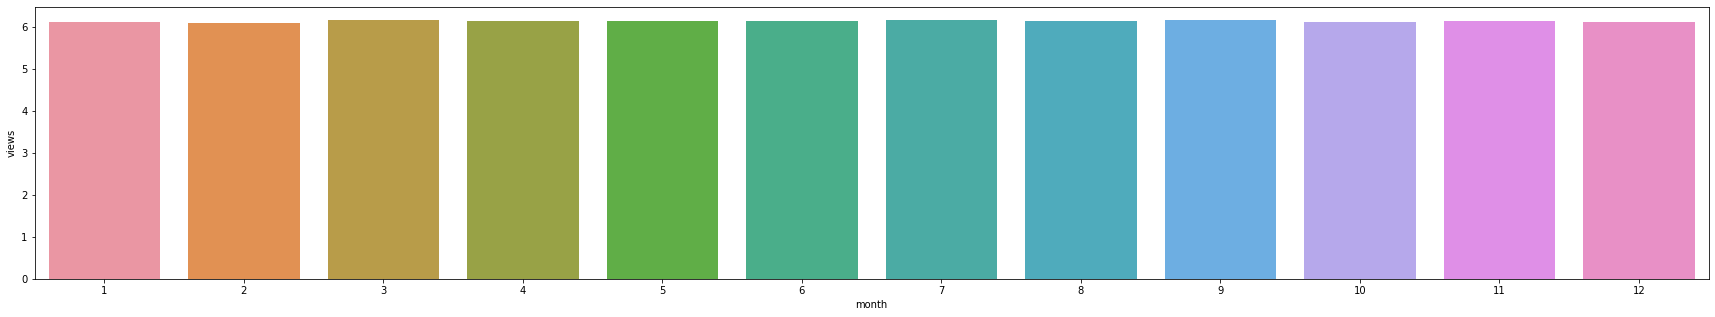

In [ ]:
sns.barplot(x='month',y='views',data=df5)

In [ ]:
# No such monthly variation in views

In [ ]:
#Analysing with day_name

<AxesSubplot:xlabel='day_name', ylabel='views'>

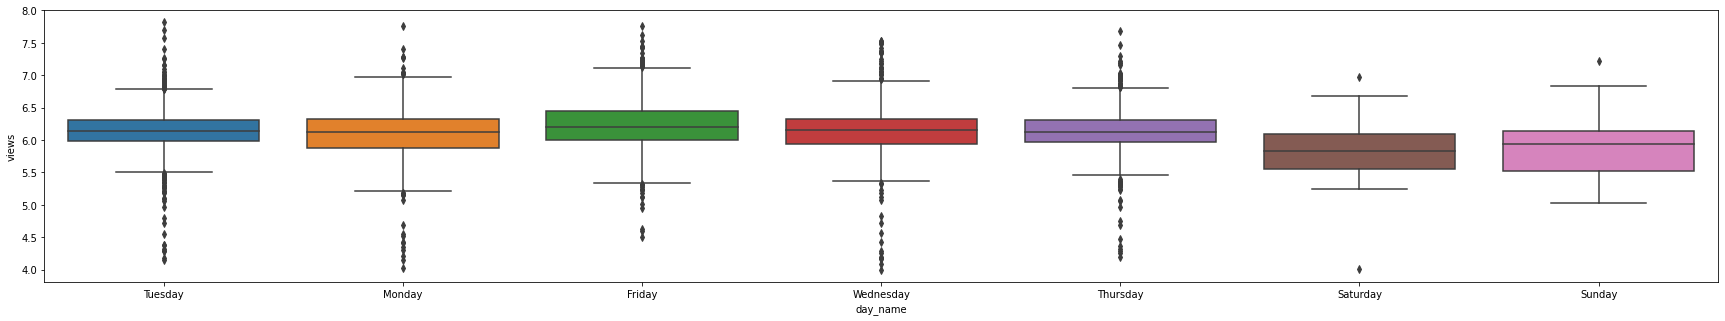

In [ ]:
sns.boxplot(x='day_name',y='views',data=data)

In [ ]:
#Again on weekend views seem lesser

<AxesSubplot:xlabel='day', ylabel='views'>

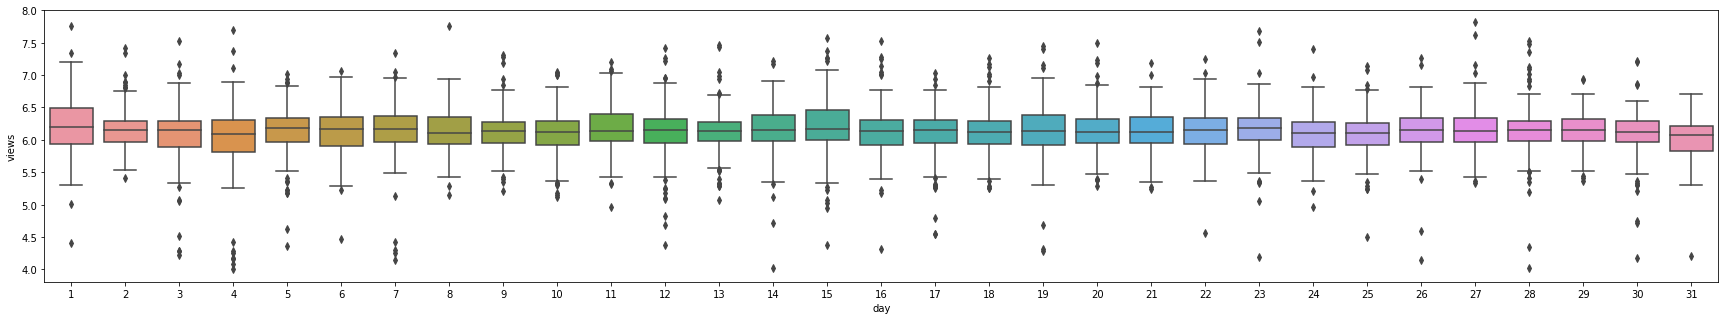

In [ ]:
sns.boxplot(x='day',y='views',data=data)

In [ ]:
# No trend of month days with views

In [ ]:
df6=data[['views','month']].groupby('month').agg({'views':'sum'})
df6.reset_index(inplace=True)

<AxesSubplot:xlabel='month', ylabel='views'>

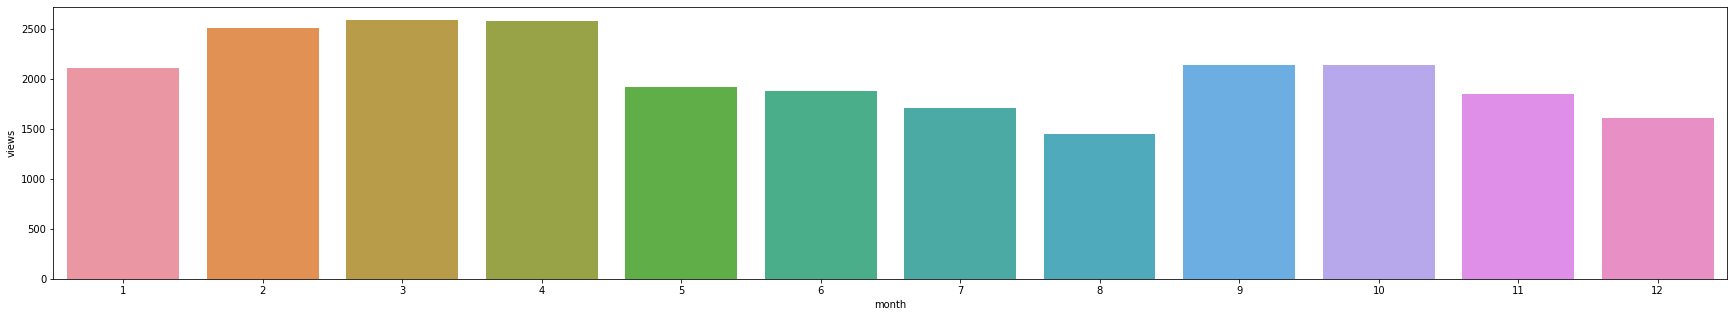

In [ ]:
sns.barplot(x='month',y='views',data=df6)

In [ ]:
df7=data[['views','month']].groupby('month').agg({'views':'median'})
df7.reset_index(inplace=True)

<AxesSubplot:xlabel='month', ylabel='views'>

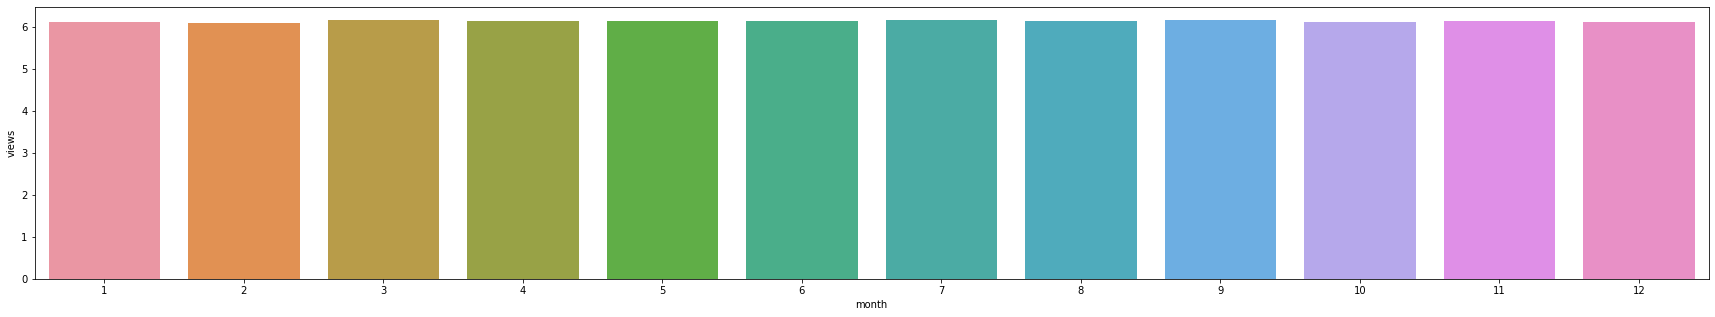

In [ ]:
sns.barplot(x='month',y='views',data=df7)

In [ ]:
# No trend in month level if we median event piew per month

In [ ]:
#Analysing year

In [ ]:
data['year'].value_counts()

2019    700
2018    474
2017    315
2012    302
2011    255
2013    243
2016    242
2014    240
2010    230
2009    221
2015    220
2020    209
2008    179
2007    119
2006     49
Name: year, dtype: int64

In [ ]:
#No of events are increasing with time

In [ ]:
df8=data[['views','year']].groupby('year').agg({'views':'sum'})
df8.reset_index(inplace=True)

<AxesSubplot:xlabel='year', ylabel='views'>

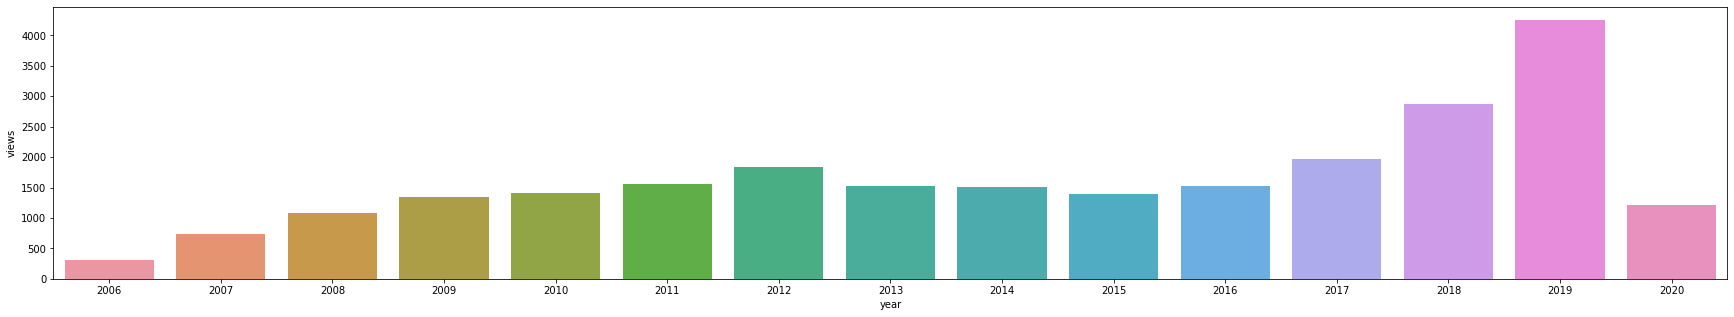

In [ ]:
sns.barplot(x='year',y='views',data=df8)

In [ ]:
#Most no of views in 2019. But not on per event level

In [ ]:
df9=data[['views','year']].groupby('year').agg({'views':'median'})
df9.reset_index(inplace=True)

<AxesSubplot:xlabel='year', ylabel='views'>

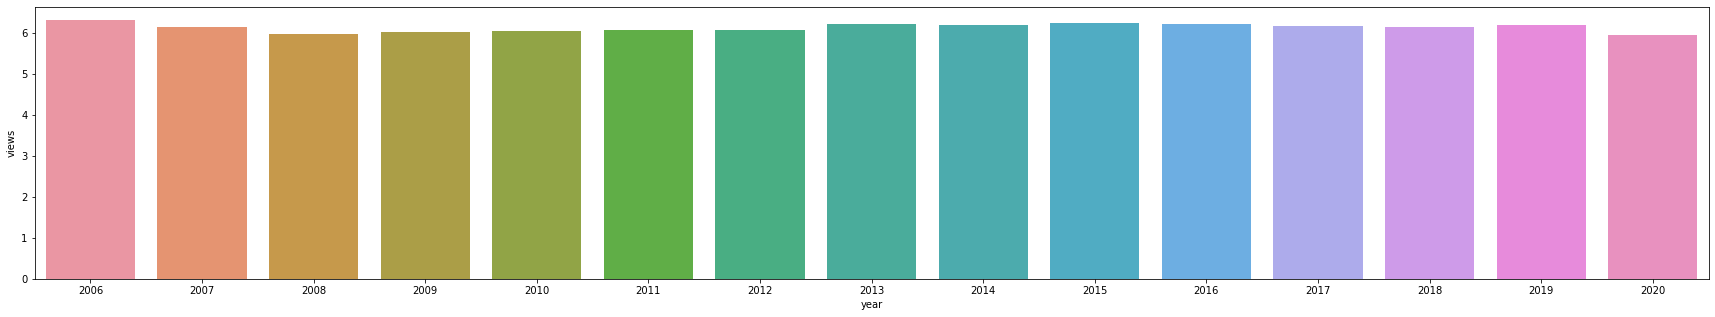

In [ ]:
sns.barplot(x='year',y='views',data=df9)

In [ ]:
#Again no such trend

# **New Columns created--old_days1,is_weekend**

# **Analysing -other categorical variables**

In [ ]:
data.head(2)

title     speaker_1         all_speakers  \
0      Averting the climate crisis       Al Gore       {0: 'Al Gore'}   
1  The best stats you've ever seen  Hans Rosling  {0: 'Hans Rosling'}   

                                     occupations  \
0                      {0: ['climate advocate']}   
1  {0: ['global health expert; data visionary']}   

                                      about_speakers     views recorded_date  \
0  {0: 'Nobel Laureate Al Gore focused the world’...  6.546961    2006-02-25   
1  {0: 'In Hans Rosling’s hands, data sings. Glob...  7.161418    2006-02-22   

  published_date    event native_lang  \
0     2006-06-27  TED2006          en   
1     2006-06-27  TED2006          en   

                                      available_lang  comments  duration  \
0  ['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...     272.0     977.0   
1  ['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...      68.0    1190.0   

                                              topics  \
0  ['alternative energy', 'cars', 'climate change...   
1  ['Africa', 'Asia', 'Google', 'demo', 'economic...   

                                       related_talks  \
0  {243: 'New thinking on the climate crisis', 54...   
1  {2056: "Own your body's data", 2296: 'A visual...   

                                         description  days_old1  day  month  \
0  With the same humor and humanity he exuded in ...        122   27      6   
1  You've never seen data presented like this. Wi...        125   27      6   

  day_name  is_weekend  year  days_old2  
0  Tuesday           0  2006          0  
1  Tuesday           0  2006          0

In [ ]:
#native language

In [ ]:
x=data['all_speakers'][0]

In [ ]:
x

"{0: 'Al Gore'}"

In [ ]:
x[0]

'{'

In [ ]:
data['speaker_1'].isnull().sum()

0

In [ ]:
print(data['all_speakers'].str.contains(u'\|1:\|'))

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71    

In [ ]:
#All Speaker and speaker1 are same. So removing all speakers

In [ ]:
data=data.drop('all_speakers',axis=1)

In [ ]:
len(data['available_lang'][0])

270

In [ ]:
data['speaker_1'].value_counts()

Alex Gendler                                              34
Iseult Gillespie                                          19
Emma Bryce                                                12
Daniel Finkel                                             11
Hans Rosling                                              10
Alex Rosenthal                                            10
Juan Enriquez                                              9
Greg Gage                                                  9
Chris Anderson                                             8
Dan Ariely                                                 7
Marco Tempest                                              7
Elizabeth Cox                                              6
Joy Lin                                                    6
Bill Gates                                                 6
Stewart Brand                                              6
 Rives                                                     6
Jacqueline Novogratz    

In [ ]:
data.head(2)

title     speaker_1  \
0      Averting the climate crisis       Al Gore   
1  The best stats you've ever seen  Hans Rosling   

                                     occupations  \
0                      {0: ['climate advocate']}   
1  {0: ['global health expert; data visionary']}   

                                      about_speakers     views recorded_date  \
0  {0: 'Nobel Laureate Al Gore focused the world’...  6.546961    2006-02-25   
1  {0: 'In Hans Rosling’s hands, data sings. Glob...  7.161418    2006-02-22   

  published_date    event native_lang  \
0     2006-06-27  TED2006          en   
1     2006-06-27  TED2006          en   

                                      available_lang  comments  duration  \
0  ['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...     272.0     977.0   
1  ['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...      68.0    1190.0   

                                              topics  \
0  ['alternative energy', 'cars', 'climate change...   
1  ['Africa', 'Asia', 'Google', 'demo', 'economic...   

                                       related_talks  \
0  {243: 'New thinking on the climate crisis', 54...   
1  {2056: "Own your body's data", 2296: 'A visual...   

                                         description  days_old1  day  month  \
0  With the same humor and humanity he exuded in ...        122   27      6   
1  You've never seen data presented like this. Wi...        125   27      6   

  day_name  is_weekend  year  days_old2  
0  Tuesday           0  2006          0  
1  Tuesday           0  2006          0

In [ ]:
df7=data[['speaker_1','views']].groupby('speaker_1').agg({'views':'sum'})
df7.reset_index(inplace=True)
df7=df7.sort_values('views')

In [ ]:
df7.tail(10)

speaker_1       views
683         Dan Ariely   45.216178
579     Chris Anderson   50.532593
1194         Greg Gage   54.053725
107     Alex Rosenthal   54.793748
1636     Juan Enriquez   56.470731
1229      Hans Rosling   64.664438
713      Daniel Finkel   67.243326
996         Emma Bryce   74.242889
1316  Iseult Gillespie  110.477146
103       Alex Gendler  213.588718

<AxesSubplot:xlabel='speaker_1', ylabel='views'>

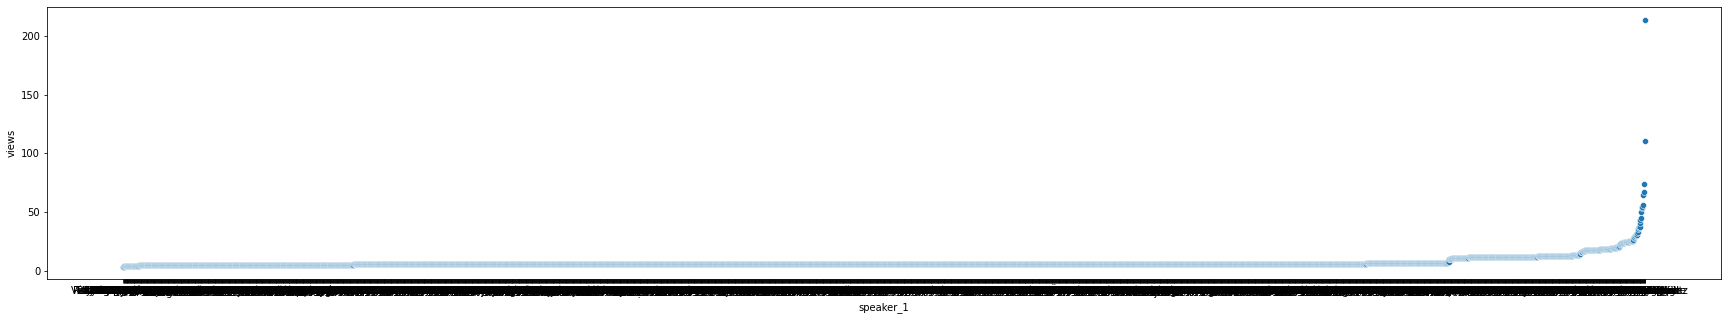

In [ ]:
sns.scatterplot(x='speaker_1',y='views',data=df7)

In [ ]:
df7=data[['speaker_1','views']].groupby('speaker_1').agg({'views':'median'})
df7.reset_index(inplace=True)

<AxesSubplot:xlabel='speaker_1', ylabel='views'>

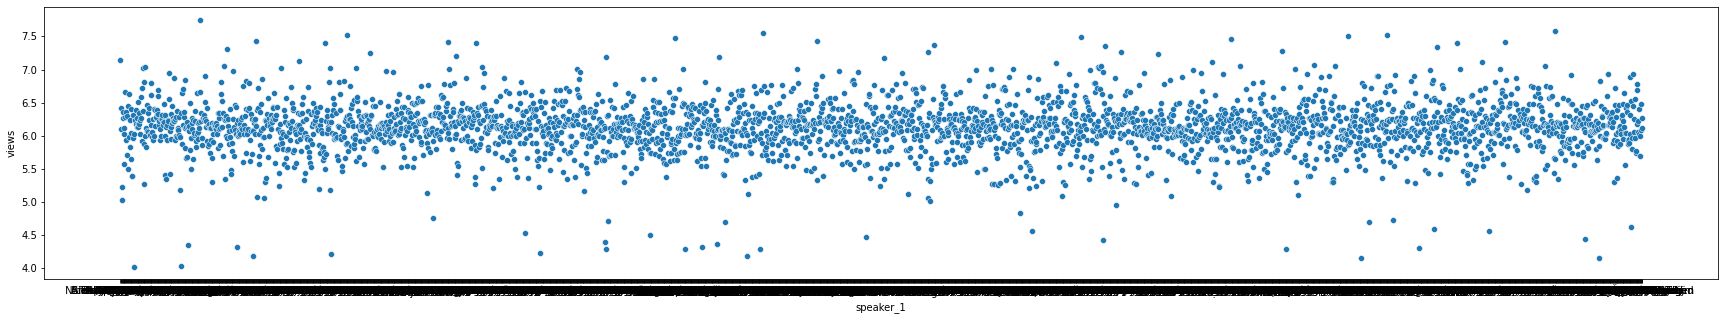

In [ ]:
sns.scatterplot(x='speaker_1',y='views',data=df7)

In [ ]:
#These are the top 10 speakers. In terms of how many times they have spoken in ted event.No clear cut relation between speaker name and avg views. Need more am

# **Analysing Language**

In [ ]:
data['native_lang'].value_counts()

en       3954
es         23
fr          9
ja          3
hi          2
de          1
pt          1
ko          1
zh-cn       1
ar          1
pt-br       1
it          1
Name: native_lang, dtype: int64

In [ ]:
#>90% are in english . No point of keeping this column

In [ ]:
data['available_lang'].head(5)

0    ['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...
1    ['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...
2    ['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...
3    ['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...
4    ['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...
Name: available_lang, dtype: object

In [ ]:
type(data['available_lang'][0])

str

In [ ]:
x=data['available_lang'][0]

In [ ]:
x

"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa', 'fr', 'fr-ca', 'gl', 'gu', 'he', 'hi', 'hr', 'hu', 'id', 'it', 'ja', 'ko', 'lt', 'lv', 'mk', 'nl', 'pl', 'pt', 'pt-br', 'ro', 'ru', 'sk', 'sl', 'sq', 'sr', 'sv', 'sw', 'th', 'tl', 'tr', 'uk', 'ur', 'vi', 'zh-cn', 'zh-tw']"

In [ ]:
x=x.replace('[','')

In [ ]:
x=x.replace(']','')

In [ ]:
x=x.replace("'","")

In [ ]:
x=x.split(",")

In [ ]:
for i in x:
    print(i)

ar
 bg
 cs
 de
 el
 en
 es
 fa
 fr
 fr-ca
 gl
 gu
 he
 hi
 hr
 hu
 id
 it
 ja
 ko
 lt
 lv
 mk
 nl
 pl
 pt
 pt-br
 ro
 ru
 sk
 sl
 sq
 sr
 sv
 sw
 th
 tl
 tr
 uk
 ur
 vi
 zh-cn
 zh-tw


In [ ]:
av_lang={}

In [ ]:
df

days_old1     views
0            0  5.829894
1            1  6.092783
2            2  6.232064
3            3  6.278145
4            4  6.264578
5            5  6.153414
6            6  6.264917
7            7  6.057281
8            8  6.207250
9            9  6.297300
10          10  6.108948
11          11  6.707400
12          12  6.137159
13          13  6.317467
14          14  6.240486
15          15  6.168242
16          16  6.267781
17          17  6.053030
18          18  6.171808
19          19  6.238201
20          20  6.403095
21          21  6.200180
22          22  6.158650
23          23  6.351415
24          24  6.193084
25          25  6.144701
26          26  6.165779
27          27  6.102441
28          28  6.340470
29          29  6.192763
30          30  6.218813
31          31  6.245104
32          32  6.260848
33          33  6.095896
34          34  6.251680
35          35  6.204688
36          36  6.209213
37          37  6.279458
38          38  6.411669
39          39  6.216274
40          40  6.140522
41          41  6.114697
42          42  6.187917
43          43  6.163336
44          44  6.234644
45          45  6.218106
46          46  6.156609
47          47  6.182149
48          48  6.051714
49          49  6.148336
50          50  6.233934
51          51  6.205201
52          52  6.238346
53          53  6.138195
54          54  6.088655
55          55  6.233082
56          56  6.188385
57          57  6.179363
58          58  6.120360
59          59  5.956759
60          60  6.248427
61          61  6.134137
62          62  6.127420
63          63  6.137459
64          64  6.289824
65          65  6.180588
66          66  6.025736
67          67  6.190816
68          68  6.101367
69          69  5.942849
70          70  6.118798
71          71  6.180022
72          72  6.131271
73          73  6.222114
74          74  6.252106
75          75  6.148847
76          76  6.193981
77          77  6.158523
78          78  6.219213
79          79  6.184060
80          80  6.178262
81          81  6.217229
82          82  6.211241
83          83  6.285323
84          84  6.198398
85          85  6.137121
86          86  6.175538
87          87  6.166624
88          88  6.089159
89          89  6.120140
90          90  6.216399
91          91  6.095198
92          92  6.173328
93          93  6.183529
94          94  6.226142
95          95  6.223472
96          96  6.193116
97          97  6.143505
98          98  6.055145
99          99  6.189222
100        100  6.147646
101        101  6.306267
102        102  6.108790
103        103  6.108204
104        104  6.259146
105        105  6.070035
106        106  6.246152
107        107  6.074950
108        108  6.167252
109        109  6.017181
110        110  6.133756
111        111  6.181630
112        112  6.080096
113        113  6.216954
114        114  6.069398
115        115  6.308678
116        116  6.156762
117        117  6.101394
118        118  6.149740
119        119  6.034318
120        120  6.202936
121        121  6.044094
122        122  6.205326
123        123  5.984680
124        124  6.109850
125        125  6.248991
126        126  6.237256
127        127  6.065084
128        128  6.060789
129        129  6.237355
130        130  6.140923
131        131  6.106362
132        132  6.186136
133        133  6.085695
134        134  6.035436
135        135  6.077583
136        136  6.073014
137        137  6.211236
138        138  6.128428
139        139  6.139605
140        140  6.191053
141        141  6.064865
142        142  6.002926
143        143  6.201434
144        144  6.176701
145        145  6.339223
146        146  6.108399
147        147  6.226982
148        148  6.175625
149        149  6.092867
150        150  6.254744
151        151  6.096696
152        152  5.869303
153        153  6.081866
154        154  5.897907
155        155  6.099883
156        156  6.111743
157        157  6.090003
158        158  6.018417
159  

In [ ]:
for i in x:
    if i not in av_lang:
        av_lang[i]=1
    else:
        av_lang[i]=av_lang[i]+1    

In [ ]:
#taking each available languages and making a count of it by creating dictionary

In [ ]:
def available_lang_count(x):
    av_lang={}
    for i in x:
        i=i.replace('[','')
        i=i.replace(']','')
        i=i.replace("'","")
        i=i.split(",")

        for j in i:
            if j not in av_lang:
                av_lang[j]=1
            else:
                av_lang[j]=av_lang[j]+1
        keys=list(av_lang.keys())
        values=list(av_lang.values())
        sorted_value_index=np.argsort(values)
        sorted_av_lang={keys[i]:values[i] for i in sorted_value_index}

    return sorted_av_lang           

In [ ]:
def available_lang_views(data):
    av_lang_views={}
    l=len(data)
    
    for i in range(0,l):
        z1=data['available_lang'][i]
        #print(z1)
        z2=data['views'][i]
        #print(z2)
        z1=z1.replace('[','')
        z1=z1.replace(']','')
        z1=z1.replace("'","")
        z1=z1.split(",")
        
        
        for j in z1:
            
            if j not in av_lang_views:
                av_lang_views[j]=z2
            else:
                av_lang_views[j]=av_lang_views[j]+z2
               
    #print(av_lang_views)            
    return av_lang_views         

In [ ]:
data1=data.copy()

In [ ]:
data1.reset_index(inplace=True)

In [ ]:
data_av=available_lang_views(data1)

In [ ]:
data_av

{'ar': 23375.589150308842,
 ' bg': 13313.724303367015,
 ' cs': 9662.619619899171,
 ' de': 16695.351954861846,
 ' el': 15725.660352285999,
 ' en': 23812.753664809778,
 ' es': 24033.993409010767,
 ' fa': 18673.295558620608,
 ' fr': 23765.054883778073,
 ' fr-ca': 2102.578967927669,
 ' gl': 2053.377950991426,
 ' gu': 1024.037668884247,
 ' he': 20361.490235258916,
 ' hi': 3140.141894459741,
 ' hr': 11605.648071086724,
 ' hu': 17822.9837237788,
 ' id': 10787.812969720448,
 ' it': 21338.28469560854,
 ' ja': 21493.672533761495,
 ' ko': 23148.65697806245,
 ' lt': 4562.122814367717,
 ' lv': 3606.7733634944716,
 ' mk': 2483.100658754484,
 ' nl': 17641.434478265463,
 ' pl': 17178.41291404337,
 ' pt': 19720.94109265855,
 ' pt-br': 23973.101035758144,
 ' ro': 18688.276931049622,
 ' ru': 22669.391481289804,
 ' sk': 6308.793572320693,
 ' sl': 2951.2323066364524,
 ' sq': 4541.249338058882,
 ' sr': 15969.97679782134,
 ' sv': 7061.832614557381,
 ' sw': 688.4953460105452,
 ' th': 10114.117032522163,
 ' tl

In [ ]:
data_lang1=pd.DataFrame(data_av.items(),columns=['lang','views'])

In [ ]:
data_lang1.head(5)

lang         views
0   ar  23375.589150
1   bg  13313.724303
2   cs   9662.619620
3   de  16695.351955
4   el  15725.660352

<AxesSubplot:xlabel='lang', ylabel='views'>

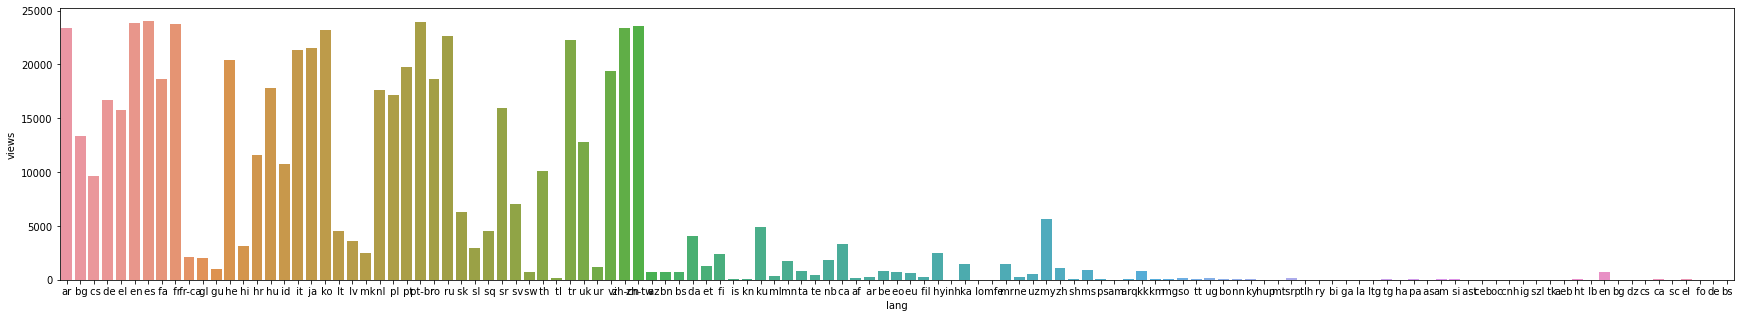

In [ ]:
sns.barplot(x='lang',y='views',data=data_lang1)

In [ ]:
a=available_lang_count(data['available_lang'])

In [ ]:
type(a)

dict

In [ ]:
data_lang=pd.DataFrame(a.items(),columns=['lang','count'])

In [ ]:
data_lang.head()

lang  count
0    bs      1
1    la      1
2    ry      1
3    ha      1
4   tlh      1

In [ ]:
data_lang2=pd.merge(data_lang1,data_lang,on='lang')

In [ ]:
data_lang2.head()

lang         views  count
0   ar  23375.589150   3799
1   bg  13313.724303   2146
2   cs   9662.619620   1539
3   de  16695.351955   2694
4   el  15725.660352   2528

In [ ]:
data_lang2['avg_views']=data_lang2['views']/data_lang2['count']

In [ ]:
data_lang2.head(5)

lang         views  count  avg_views
0   ar  23375.589150   3799   6.153090
1   bg  13313.724303   2146   6.203972
2   cs   9662.619620   1539   6.278505
3   de  16695.351955   2694   6.197235
4   el  15725.660352   2528   6.220593

<AxesSubplot:xlabel='lang', ylabel='avg_views'>

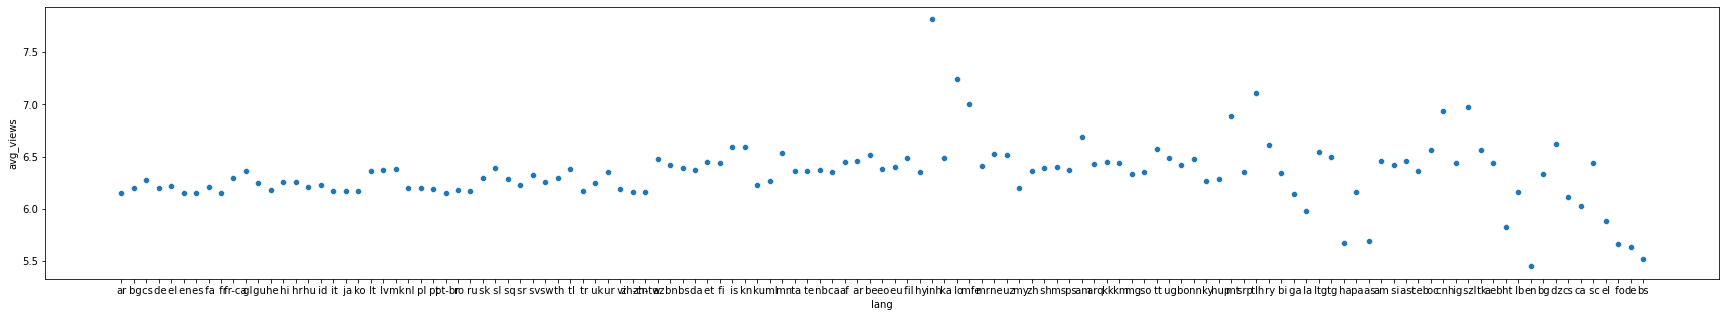

In [ ]:
sns.scatterplot(x='lang',y='avg_views',data=data_lang2)

In [ ]:
#Based on these we can conclude that any particular available lang is not having any impact

In [ ]:
data_lang[0:-10]

lang  count
0        bs      1
1        la      1
2        ry      1
3        ha      1
4       tlh      1
5        as      1
6       hup      1
7        oc      1
8       cnh      1
9        bi      1
10       dz      1
11       fo      1
12      inh      1
13      mfe      2
14       mt      2
15      ast      2
16      aeb      2
17       bg      2
18       lb      2
19       tk      2
20      ceb      2
21       am      3
22       ga      3
23       lo      3
24       sc      3
25      szl      3
26      ltg      3
27       ig      3
28       de      4
29       cs      4
30       ht      5
31       mg      6
32       tt      6
33       ca      7
34       ky      9
35       el     10
36       am     10
37       tg     11
38       pa     12
39       si     12
40       nn     12
41       km     13
42       ps     13
43       bo     14
44       sh     15
45       is     17
46       kn     17
47      arq     17
48       tl     19
49       so     20
50       ug     24
51       af     30
52      srp     33
53       ar     42
54      fil     43
55       ne     44
56       ml     62
57       te     70
58       uz     82
59       eu     94
60       sw    110
61       az    117
62       eo    118
63       bn    118
64       be    119
65       bs    119
66       kk    126
67       ta    128
68       en    129
69       ms    136
70       gu    164
71       zh    173
72       ur    187
73       et    197
74       ka    231
75       mr    235
76       mn    265
77       nb    288
78       gl    323
79    fr-ca    334
80       fi    370
81       mk    389
82       hy    396
83       sl    462
84       hi    502
85       ca    517
86       lv    566
87       da    632
88       lt    717
89       sq    722
90       ku    795
91       my    917
92       sk   1002
93       sv   1116
94       cs   1539
95       th   1606
96       id   1733
97       hr   1856
98       uk   2048
99       bg   2146
100      el   2528
101      sr   2565
102      de   2694
103      pl   2773
104      nl   2845
105      hu   2871
106      fa   3009
107      ro   3023
108      vi   3133
109      pt   3188
110      he   3295
111      it   3457
112      ja   3482

<AxesSubplot:xlabel='lang', ylabel='count'>

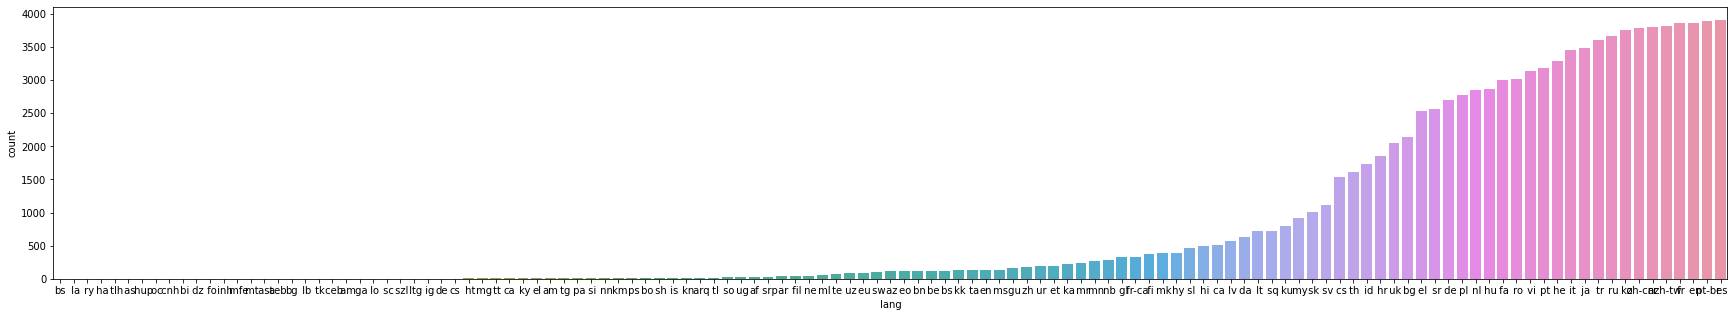

In [ ]:
sns.barplot(x='lang',y='count',data=data_lang)

In [ ]:
def a1_count(x):    
    x=x.replace('[','')
    x=x.replace(']','')
    x=x.replace("'","")
    x=x.split(",")
    return len(x)


In [ ]:
data['available_lang_count']=data['available_lang'].apply(lambda x: a1_count(x))

In [ ]:
data.head(5)

title         speaker_1  \
0      Averting the climate crisis           Al Gore   
1  The best stats you've ever seen      Hans Rosling   
2                 Simplicity sells       David Pogue   
3              Greening the ghetto     Majora Carter   
4      Do schools kill creativity?  Sir Ken Robinson   

                                     occupations  \
0                      {0: ['climate advocate']}   
1  {0: ['global health expert; data visionary']}   
2                  {0: ['technology columnist']}   
3    {0: ['activist for environmental justice']}   
4                    {0: ['author', 'educator']}   

                                      about_speakers     views recorded_date  \
0  {0: 'Nobel Laureate Al Gore focused the world’...  6.546961    2006-02-25   
1  {0: 'In Hans Rosling’s hands, data sings. Glob...  7.161418    2006-02-22   
2  {0: 'David Pogue is the personal technology co...  6.283489    2006-02-24   
3  {0: 'Majora Carter redefined the field of envi...  6.425545    2006-02-26   
4  {0: "Creativity expert Sir Ken Robinson challe...  7.813260    2006-02-25   

  published_date    event native_lang  \
0     2006-06-27  TED2006          en   
1     2006-06-27  TED2006          en   
2     2006-06-27  TED2006          en   
3     2006-06-27  TED2006          en   
4     2006-06-27  TED2006          en   

                                      available_lang  comments  duration  \
0  ['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...     272.0     977.0   
1  ['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...      68.0    1190.0   
2  ['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...     124.0    1286.0   
3  ['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...     219.0    1116.0   
4  ['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...      68.0    1164.0   

                                              topics  \
0  ['alternative energy', 'cars', 'climate change...   
1  ['Africa', 'Asia', 'Google', 'demo', 'economic...   
2  ['computers', 'entertainment', 'interface desi...   
3  ['MacArthur grant', 'activism', 'business', 'c...   
4  ['children', 'creativity', 'culture', 'dance',...   

                                       related_talks  \
0  {243: 'New thinking on the climate crisis', 54...   
1  {2056: "Own your body's data", 2296: 'A visual...   
2  {1725: '10 top time-saving tech tips', 2274: '...   
3  {1041: '3 stories of local eco-entrepreneurshi...   
4  {865: 'Bring on the learning revolution!', 173...   

                                         description  days_old1  day  month  \
0  With the same humor and humanity he exuded in ...        122   27      6   
1  You've never seen data presented like this. Wi...        125   27      6   
2  New York Times columnist David Pogue takes aim...        123   27      6   
3  In an emotionally charged talk, MacArthur-winn...        121   27      6   
4  Sir Ken Robinson makes an entertaining and pro...        122   27      6   

  day_name  is_weekend  year  days_old2  available_lang_count  
0  Tuesday           0  2006          0                    43  
1  Tuesday           0  2006          0                    49  
2  Tuesday           0  2006          0                    26  
3  Tuesday           0  2006          0                    35  
4  Tuesday           0  2006          0                    62

In [ ]:
df8=data[['views','available_lang_count']].groupby('available_lang_count').agg({'views':'median'})
df8.reset_index(inplace=True)

<AxesSubplot:xlabel='available_lang_count', ylabel='views'>

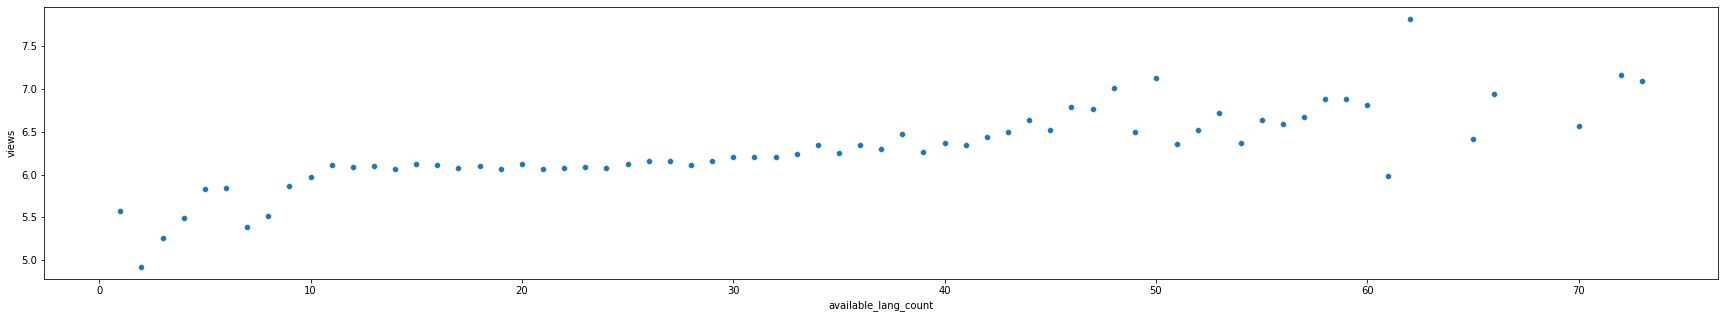

In [ ]:
sns.scatterplot(x='available_lang_count',y='views',data=df8)

In [ ]:
#We can conclude that available_lang_count if more then view is more. Linear relation slight

In [ ]:
#There is a somewhat linear relationship between no of available languages for a video and the no of views

# **Analysing-Topics**

In [ ]:
data['topics'][0]

"['alternative energy', 'cars', 'climate change', 'culture', 'environment', 'global issues', 'science', 'sustainability', 'technology']"

In [ ]:

def topic_count(x):    
    x=x.replace('[','')
    x=x.replace(']','')
    x=x.replace("'","")
    x=x.split(",")
    return len(x)


In [ ]:
data['topics_count']=data['topics'].apply(lambda x: topic_count(x))

<AxesSubplot:xlabel='topics_count', ylabel='views'>

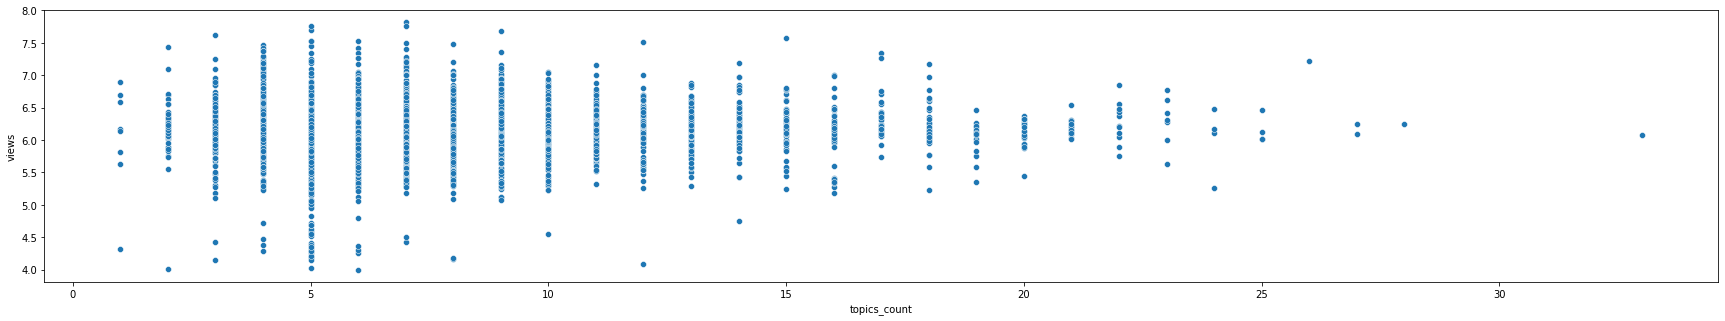

In [ ]:
sns.scatterplot(x='topics_count',y='views',data=data)

In [ ]:
df8=data[['topics_count','views']].groupby('topics_count').agg({'views':'median'})
df8.reset_index(inplace=True)

<AxesSubplot:xlabel='topics_count', ylabel='views'>

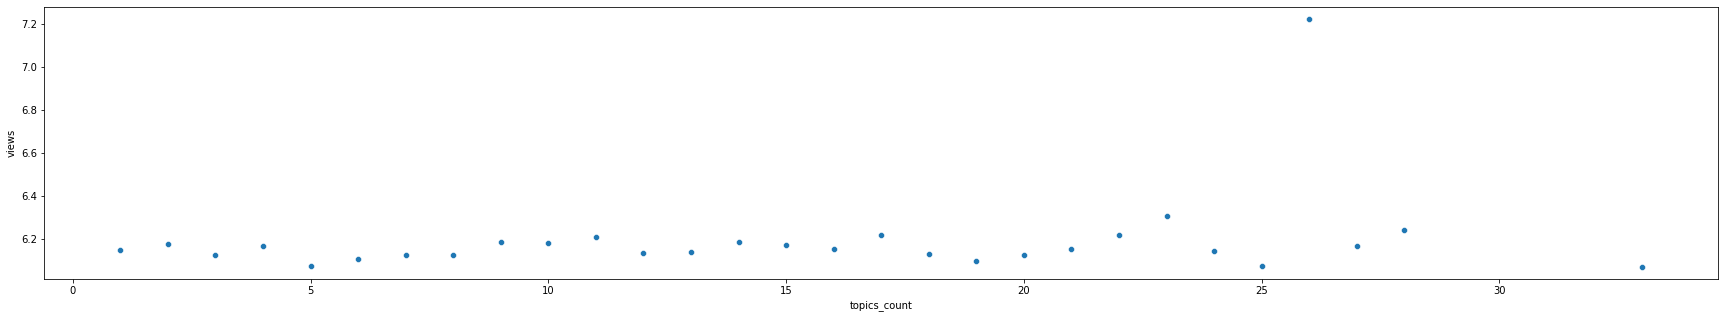

In [ ]:
sns.scatterplot(x='topics_count',y='views',data=df8)

In [ ]:
#No Such relation between no of topics available and views

In [ ]:
def dict_topics(x):
    d_topic={}
    for i in x:
        i=i.replace("[","")
        i=i.replace("]","")
        i=i.replace("'","")
        i=i.split(",")
        for j in i:
            if( j not in d_topic):
                d_topic[j]=1
            else:
                d_topic[j]=d_topic[j]+1   
    keys=list(d_topic.keys())
    values=list(d_topic.values())
    sorted_value_index=np.argsort(values)
    sorted_d_topic={keys[i]:values[i] for i in sorted_value_index}             
    return sorted_d_topic

In [ ]:
d_topic=dict_topics(data['topics'])

In [ ]:
d_topic=pd.DataFrame(d_topic.items(),columns=['topics','count'])

In [ ]:
d_topic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   topics  762 non-null    object
 1   count   762 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 12.0+ KB


In [ ]:
d_topic.tail(10)

topics  count
752         history    371
753        humanity    377
754       animation    379
755          design    454
756   social change    503
757   global issues    531
758         society    551
759         culture    553
760         science    941
761      technology    948

<AxesSubplot:xlabel='topics', ylabel='count'>

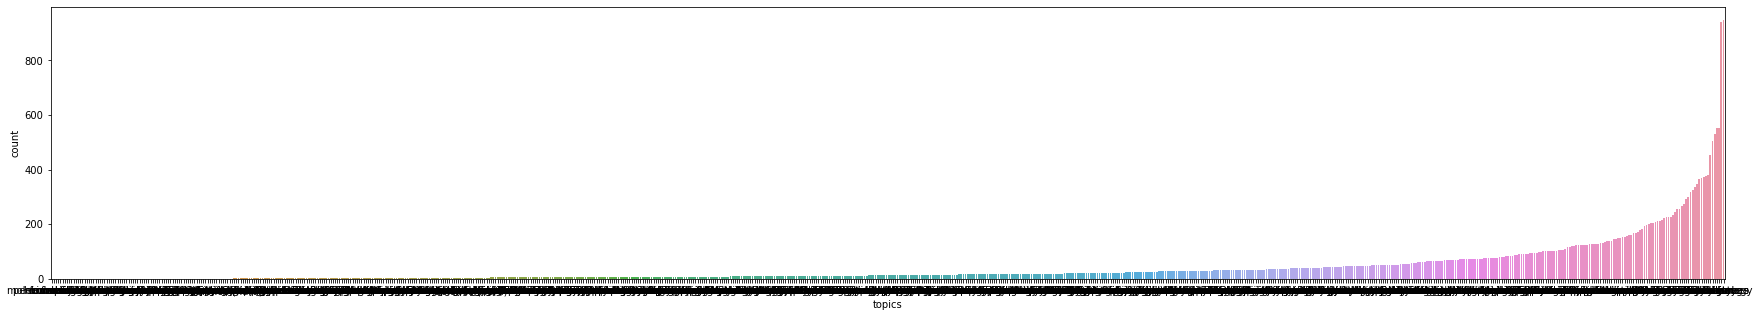

In [ ]:
sns.barplot(x='topics',y='count',data=d_topic)
#plt.figsize=(10,5000)

In [ ]:
#Science and Technology has very high number of videos

In [ ]:
def dict_topics_views(data):
    d_topic_views={}
    l=len(data)
    for i in range(0,l):
        a=data['topics'][i]
        b=data['views'][i]
        a=a.replace("[","")
        a=a.replace("]","")
        a=a.replace("'","")
        a=a.split(",")
        for j in a:
            if( j not in d_topic_views):
                d_topic_views[j]=b
            else:
                d_topic_views[j]=d_topic_views[j]+b              
    return d_topic_views

In [ ]:
d_topic_views1=dict_topics_views(data1)

In [ ]:
d_topic_views1

{'alternative energy': 140.2782313451106,
 ' cars': 103.53252649204482,
 ' climate change': 823.3320043957101,
 ' culture': 3406.848633551092,
 ' environment': 1368.3554700215186,
 ' global issues': 3225.1809079312698,
 ' science': 5784.423514501451,
 ' sustainability': 886.5335553100318,
 ' technology': 5785.465395012815,
 'Africa': 603.1457905144766,
 ' Asia': 118.35667254152945,
 ' Google': 44.81546093325627,
 ' demo': 303.9135133909529,
 ' economics': 1304.1591744716288,
 ' health': 2266.8934329622753,
 ' statistics': 223.57133656139774,
 ' global development': 453.6798929314782,
 ' visualizations': 594.8867599188253,
 ' math': 795.9644947592982,
 'computers': 93.12173178099128,
 ' entertainment': 1842.2639984221573,
 ' interface design': 196.60703610077326,
 ' media': 573.029419198441,
 ' music': 899.3810263547508,
 ' performance': 833.4455522267334,
 ' simplicity': 86.51007336078078,
 ' software': 374.3946837890028,
 'MacArthur grant': 60.6939072283599,
 ' activism': 954.59054238

In [ ]:
d_topic_views1['india']

35.24412937280596

In [ ]:
d_topic_views2=pd.DataFrame(d_topic_views1.items(),columns=['topics','views'])

In [ ]:
d_topic_views2.head(5)

topics        views
0  alternative energy   140.278231
1                cars   103.532526
2      climate change   823.332004
3             culture  3406.848634
4         environment  1368.355470

<AxesSubplot:xlabel='topics', ylabel='views'>

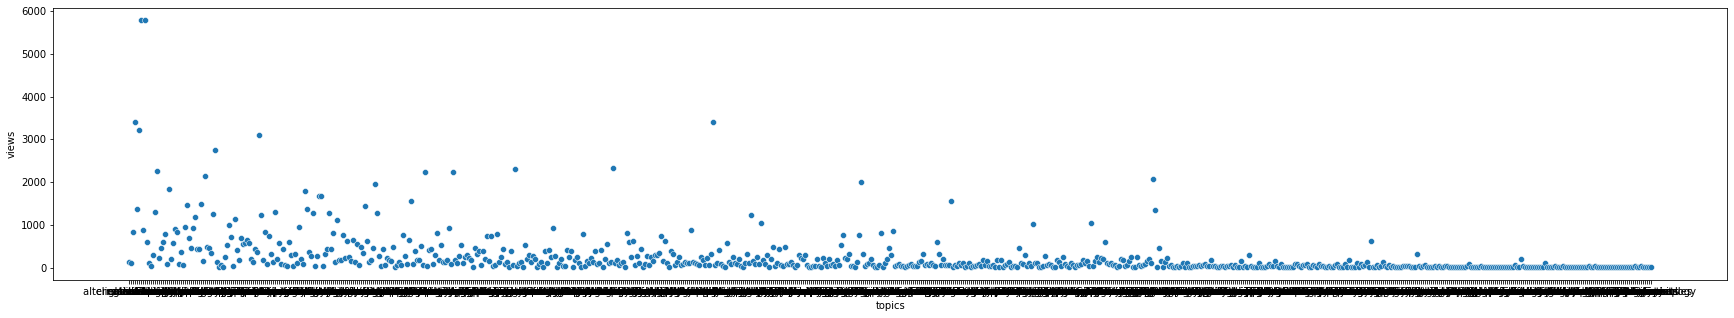

In [ ]:
sns.scatterplot(x='topics',y='views',data=d_topic_views2)

In [ ]:
#no observable trend

# **Analysing Occupation**

In [ ]:
data['occupations'].head(10)

0                        {0: ['climate advocate']}
1    {0: ['global health expert; data visionary']}
2                    {0: ['technology columnist']}
3      {0: ['activist for environmental justice']}
4                      {0: ['author', 'educator']}
5                               {0: ['architect']}
6         {0: ['actor', 'comedian', 'playwright']}
7      {0: ['philosopher', 'cognitive scientist']}
8                        {0: ['pastor', 'author']}
9                               {0: ['filmmaker']}
Name: occupations, dtype: object

In [ ]:
#there is a dictionary of occupations for a video. So have to organize it

In [ ]:
d=data['occupations'][1]

In [ ]:
d

"{0: ['global health expert; data visionary']}"

In [ ]:
import ast,json,re

In [ ]:
def occupation(x):
    dict_occupations={}
    d1={}
    for i in x:
            
            #i=i.replace("'", "\"")
            p = re.compile('(?<!\\\\)\'')
            i = p.sub('\"', i)
            d1=ast.literal_eval(i)
            #print(d1)
            for j in d1:
                for k in d1[j]:
                    if k not in dict_occupations:
                        dict_occupations[k]=1
                    else:
                        dict_occupations[k]=dict_occupations[k]+1
    return dict_occupations                    

In [ ]:
data['occupations'] = data.apply(lambda x: eval(x['occupations']), axis=1)

In [ ]:
#defining a new feature called occupation
data['occupation'] = 'other'
#iterating through the each row and extracting occupations of speakers
for index, row in data.iterrows():
    occup_list=list(row['occupations'].values())[0][0]
    data.loc[index,'occupation'] = str(occup_list)
     

In [ ]:
data['occupations'][3755]

{0: ['astrophysicist', 'writer', 'educator']}

In [ ]:
x=data['occupations'][3755][0]

In [ ]:
data['occupations'][3768]

{0: ['head of ted'], 1: ['climate advocate']}

In [ ]:
data['occupations'][0].keys()

dict_keys([0])

In [ ]:
data['occupations'][3768][1]

['climate advocate']

In [ ]:
data['speaker_occupation'] = data.apply(lambda row : row['occupations'][0][0],axis=1)

In [ ]:
#Preliminary observation suggests no such relation between occupation and views

In [ ]:
data['speaker_occupation'][3768]

'head of ted'

# **Analysing-Event**

In [ ]:
data['event'].value_counts()

TED-Ed                                  555
TED2018                                  96
TED2017                                  96
TED2019                                  91
TED2014                                  84
TED2009                                  81
TED2016                                  75
TED2013                                  75
TED2015                                  75
TEDGlobal 2012                           70
TED2011                                  70
TED2007                                  68
TED2010                                  68
TEDGlobal 2011                           68
TEDGlobal 2013                           67
TED2012                                  65
TEDGlobal 2009                           63
TED2008                                  56
TEDGlobal 2010                           55
TEDGlobal 2017                           53
TEDGlobal 2014                           51
TED2006                                  42
TED Residency                   

In [ ]:
data['event_group']='Others'


In [ ]:
df11=data[['event','views']].groupby('event').agg({'views':'sum'}).nlargest(100,['views'])
df11.reset_index(inplace=True)

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   event   100 non-null    object 
 1   views   100 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [ ]:
df11.head(20)

event        views
0           TED-Ed  3374.817831
1          TED2017   600.907104
2          TED2018   596.028915
3          TED2019   557.767745
4          TED2014   532.143767
5          TED2009   498.266400
6          TED2015   477.768088
7          TED2013   476.187300
8          TED2016   473.541310
9          TED2011   438.040923
10  TEDGlobal 2012   432.150119
11  TEDGlobal 2013   422.067389
12         TED2010   421.139343
13  TEDGlobal 2011   417.810917
14         TED2007   414.986001
15         TED2012   407.552754
16  TEDGlobal 2009   385.896982
17         TED2008   348.337991
18  TEDGlobal 2010   336.761202
19  TEDGlobal 2017   318.985178

<AxesSubplot:xlabel='event', ylabel='views'>

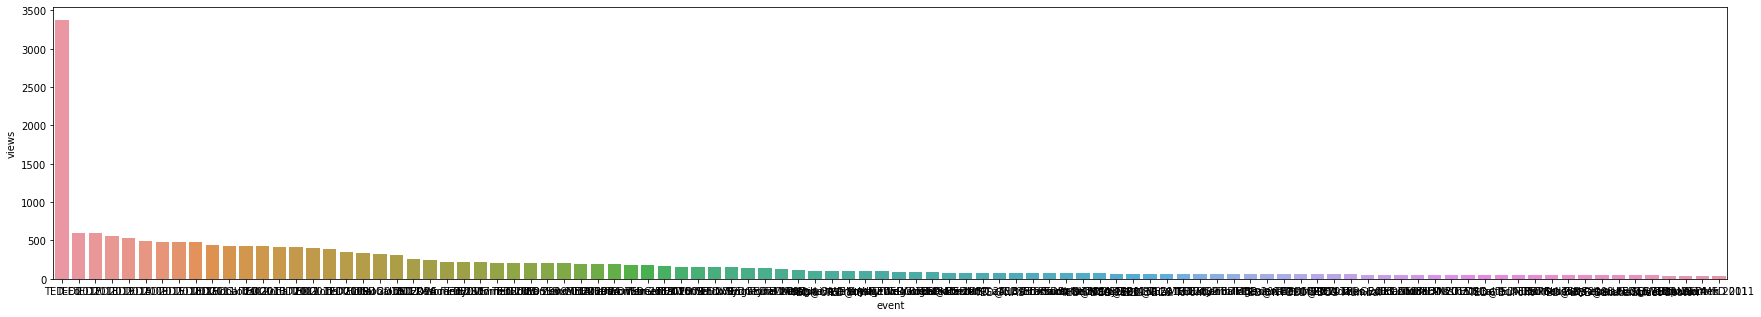

In [ ]:
sns.barplot(x='event',y='views',data=df11)

In [ ]:
df1=data[['event','views']].groupby('event').agg({'views':'mean'})
df1.reset_index(inplace=True)

In [ ]:
df2=data[['event','views']].groupby('event').agg({'views':'median'})
df2.reset_index(inplace=True)

In [ ]:
df1.head(20)

event     views
0             Arbejdsglaede Live  6.040707
1    Business Innovation Factory  5.635051
2         Chautauqua Institution  5.521318
3                      Countdown  6.174167
4                      Currently  6.292311
5               DIY Neuroscience  5.762684
6                       DLD 2007  5.939977
7                        EG 2007  5.951312
8                        EG 2008  6.284740
9   Elizabeth G. Anderson School  6.103001
10       Full Spectrum Auditions  6.117303
11                Global Witness  6.041827
12                INK Conference  6.067620
13                     LIFT 2007  6.254751
14               Mission Blue II  6.168174
15           Mission Blue Voyage  5.754860
16             Serious Play 2008  5.946796
17        Skoll World Forum 2007  5.708818
18          Small Thing Big Idea  5.617155
19                  TED Connects  6.107751

<AxesSubplot:xlabel='event', ylabel='views'>

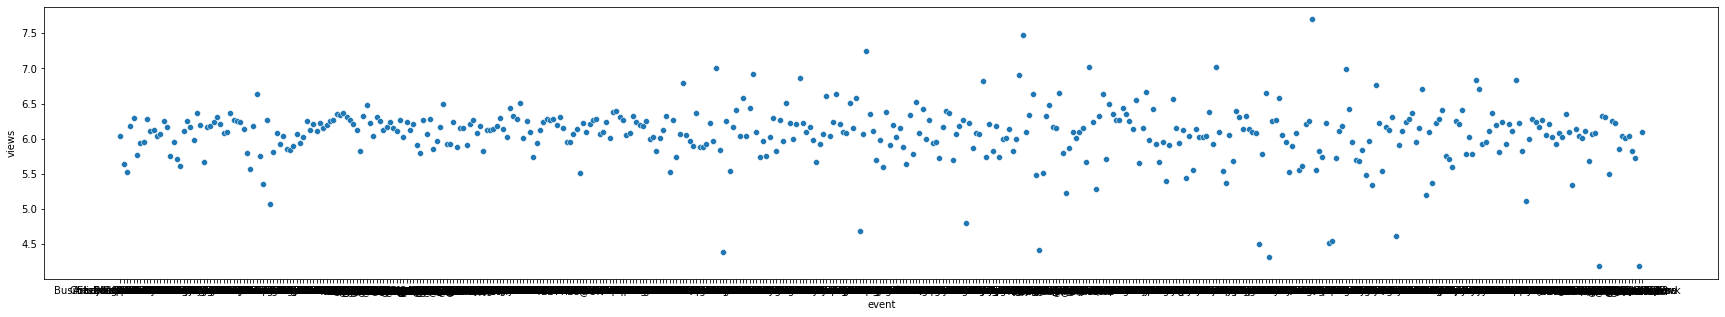

In [ ]:
sns.scatterplot(x='event',y='views',data=df1)

<AxesSubplot:xlabel='event', ylabel='views'>

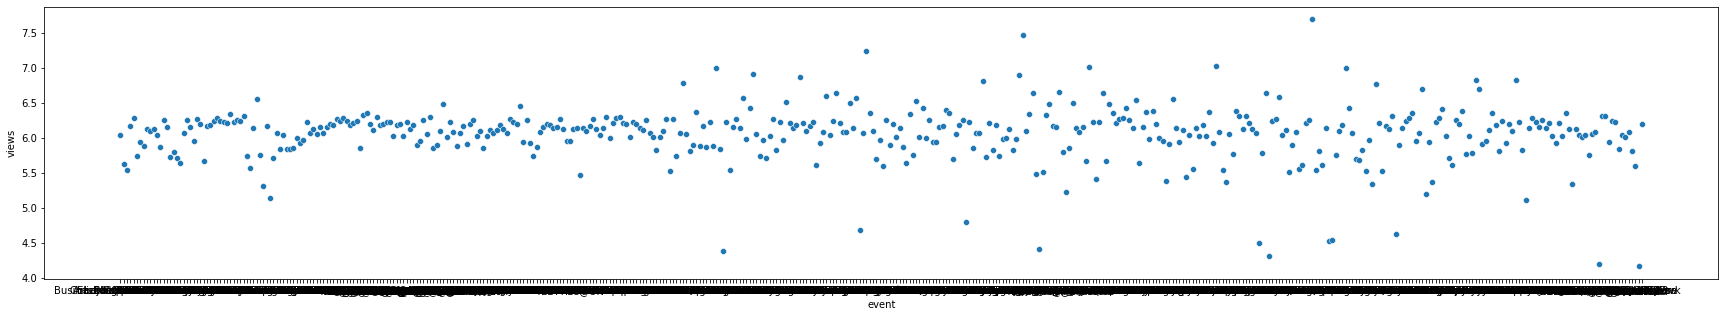

In [ ]:
sns.scatterplot(x='event',y='views',data=df2)

In [ ]:
#Even after seeing mean and median views based on topics No particular trend observed. hence event ha no such effect and can be removed

# **Dropping the unimportant columns**

In [ ]:
data2=data[['comments','duration','days_old1','is_weekend','available_lang_count','views']]

In [ ]:
data3=data[['comments','duration','days_old1','is_weekend','available_lang_count']]

In [ ]:
data4=data[['comments','duration','days_old1','available_lang_count']]

In [ ]:
data3.corr()

comments  duration  days_old1  is_weekend  \
comments              1.000000  0.300135  -0.191365    0.108893   
duration              0.300135  1.000000  -0.087390    0.052543   
days_old1            -0.191365 -0.087390   1.000000   -0.017731   
is_weekend            0.108893  0.052543  -0.017731    1.000000   
available_lang_count  0.463020 -0.082013  -0.099692   -0.029836   

                      available_lang_count  
comments                          0.463020  
duration                         -0.082013  
days_old1                        -0.099692  
is_weekend                       -0.029836  
available_lang_count              1.000000

<AxesSubplot:>

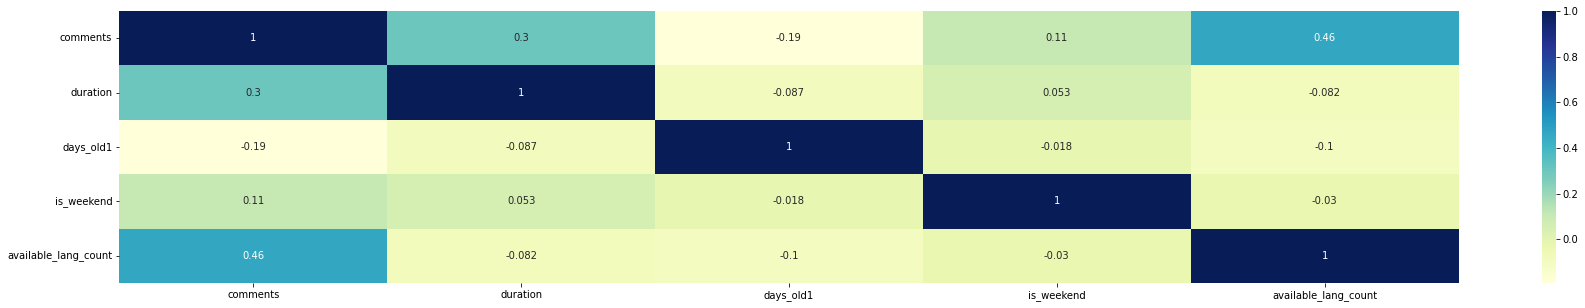

In [ ]:
sns.heatmap(data3.corr(),cmap="YlGnBu",annot=True)

In [ ]:
#There is some correlation between available language count and comments

In [ ]:
#Applying VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = data3.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data3.values, i)
                          for i in range(len(data3.columns))]
  
print(vif_data)

                feature       VIF
0              comments  2.763435
1              duration  3.746485
2             days_old1  1.274189
3            is_weekend  1.040440
4  available_lang_count  4.541951


In [ ]:
vif_data1 = pd.DataFrame()
vif_data1["feature"] = data4.columns
  
# calculating VIF for each feature
vif_data1["VIF"] = [variance_inflation_factor(data4.values, i)
                          for i in range(len(data4.columns))]
  
print(vif_data1)

                feature       VIF
0              comments  2.728831
1              duration  3.732776
2             days_old1  1.273809
3  available_lang_count  4.529675


In [ ]:
#Very less correlation betweeen the variables

# **Train-Test split**

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3998 entries, 0 to 4003
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   comments              3998 non-null   float64
 1   duration              3998 non-null   float64
 2   days_old1             3998 non-null   int64  
 3   is_weekend            3998 non-null   int64  
 4   available_lang_count  3998 non-null   int64  
 5   views                 3998 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 347.7 KB


In [ ]:
X=data2.drop('views',axis=1)
Y=data2['views']

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=57)

# **Standardizing Data--Using MinMax Scaler**

In [ ]:
min_max=MinMaxScaler()


In [ ]:
X_train=min_max.fit_transform(X_train)

In [ ]:
X_test=min_max.transform(X_test)

# **Modelling**

# **Applying Linear Regression**

In [ ]:
lr=LinearRegression()
lr.fit(X_train,Y_train)

Y_predict_train=lr.predict(X_train)
Y_predict_test=lr.predict(X_test)

In [ ]:
print("MSE_training=",mean_squared_error(Y_train,Y_predict_train))
print("MSE_test    =",mean_squared_error(Y_test,Y_predict_test))

print("")
print("MSRT_training=",np.math.sqrt(mean_squared_error(Y_train,Y_predict_train)))
print("MSRT_test    =",np.math.sqrt(mean_squared_error(Y_test,Y_predict_test)))
print("")
print("R2_training=",r2_score(Y_train,Y_predict_train))
print("R2_test    =",r2_score(Y_test,Y_predict_test))


MSE_training= 0.12010568455607826
MSE_test    = 0.12392469772234083

MSRT_training= 0.34656267045958405
MSRT_test    = 0.35202939894608354

R2_training= 0.2853251601228165
R2_test    = 0.29001317667125126


# **Applying-Regularization on Linear Regression**

In [ ]:
#Regularization --L1,L2

l1=Lasso()
param={'alpha':np.logspace(-8,8,100)}
l1_model=GridSearchCV(l1,param,cv=5)
l1_model.fit(X_train,Y_train)


print(l1_model.best_params_)
print(l1_model.best_score_)
print("")

Y_predict_train=l1_model.predict(X_train)
Y_predict_test=l1_model.predict(X_test)

print("MSE_training=",mean_squared_error(Y_train,Y_predict_train))
print("MSE_test    =",mean_squared_error(Y_test,Y_predict_test))

print("")

print("MSRT training=",np.math.sqrt(mean_squared_error(Y_train,Y_predict_train)))
print("MSRT test    =",np.math.sqrt(mean_squared_error(Y_test,Y_predict_test)))
print("")

print("R2 training=",r2_score(Y_train,Y_predict_train))
print("R2 test    =",r2_score(Y_test,Y_predict_test))

{'alpha': 1e-08}
0.28035227161971654

MSE_training= 0.1201056845561297
MSE_test    = 0.12392468902612473

MSRT training= 0.3465626704596583
MSRT test    = 0.3520293865945352

R2 training= 0.2853251601225104
R2 test    = 0.2900132264934332


In [ ]:
Lasso(alpha=0.2803522716197166)

Lasso(alpha=0.2803522716197166)

In [ ]:
l2=Ridge()
param={'alpha':np.logspace(-8,8,100)}
l2_model=GridSearchCV(l2,param,cv=5)
l2_model.fit(X_train,Y_train)


print(l2_model.best_params_)
print(l2_model.best_score_)
print("")

Y_predict_train=l2_model.predict(X_train)
Y_predict_test=l2_model.predict(X_test)

print("MSE_training=",mean_squared_error(Y_train,Y_predict_train))
print("MSE_test    =",mean_squared_error(Y_test,Y_predict_test))

print("")

print("MSRT training=",np.math.sqrt(mean_squared_error(Y_train,Y_predict_train)))
print("MSRT test    =",np.math.sqrt(mean_squared_error(Y_test,Y_predict_test)))
print("")

print("R2 training=",r2_score(Y_train,Y_predict_train))
print("R2 test    =",r2_score(Y_test,Y_predict_test))

{'alpha': 1e-08}
0.2803522735045611

MSE_training= 0.1201056845560783
MSE_test    = 0.1239246977215478

MSRT training= 0.3465626704595841
MSRT test    = 0.35202939894495716

R2 training= 0.2853251601228163
R2 test    = 0.2900131766757946


# **Applying Tree Based Models**

# **Decision Tree Model**

In [ ]:
dt1=DecisionTreeRegressor(criterion="squared_error",random_state=57)
dt1.fit(X_train,Y_train)

DecisionTreeRegressor(random_state=57)

In [ ]:
Y_predict_train=dt1.predict(X_train)
Y_predict_test=dt1.predict(X_test)

In [ ]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(dt1, feature_names=list(X), class_names=sorted(Y.unique()), filled=True)
graphviz.Source(dot_data)

In [ ]:


print("MSE_training=",mean_squared_error(Y_train,Y_predict_train))
print("MSE_test    =",mean_squared_error(Y_test,Y_predict_test))

print("")

print("MSRT training=",np.math.sqrt(mean_squared_error(Y_train,Y_predict_train)))
print("MSRT test    =",np.math.sqrt(mean_squared_error(Y_test,Y_predict_test)))
print("")

print("R2 training=",r2_score(Y_train,Y_predict_train))
print("R2 test    =",r2_score(Y_test,Y_predict_test))

MSE_training= 7.582926989196716e-05
MSE_test    = 0.1797473157634274

MSRT training= 0.008708000338307709
MSRT test    = 0.4239661728999466

R2 training= 0.9995487867912468
R2 test    = -0.02980461575690141


In [ ]:
#Lot of overfitting is happening

In [ ]:
dt1.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [ ]:

param_grid={'min_samples_split':[2,4,8,16],
            'max_depth':[1,3,5,7,9,11],
            'max_leaf_nodes':[2,4,6,8,10]
            }
dt_r=GridSearchCV(dt1,param_grid=param_grid,cv=5)


In [ ]:
dt_r.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=57),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11],
                         'max_leaf_nodes': [2, 4, 6, 8, 10],
                         'min_samples_split': [2, 4, 8, 16]})

In [ ]:
Y_predict_train=dt_r.predict(X_train)
Y_predict_test=dt_r.predict(X_test)

In [ ]:
dt_r.best_params_

{'max_depth': 5, 'max_leaf_nodes': 10, 'min_samples_split': 2}

In [ ]:
dt_r_best=DecisionTreeRegressor(criterion='squared_error',random_state=0)
param_grid1={'min_samples_split':[2],
            'max_depth':[5],
            'max_leaf_nodes':[10]
            }
dt_r_best=GridSearchCV(dt_r_best,param_grid=param_grid1,cv=5)

In [ ]:
dt_r_best.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [5], 'max_leaf_nodes': [10],
                         'min_samples_split': [2]})

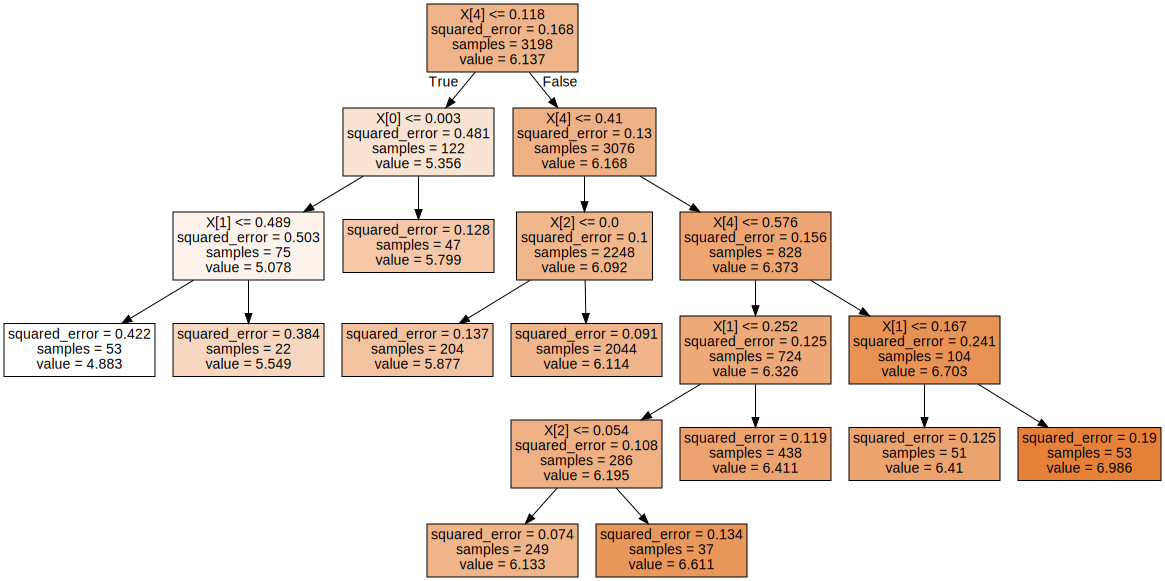

In [ ]:
dot_data = tree.export_graphviz(dt_r_best.best_estimator_, out_file=None,  
                                filled=True)
graphviz.Source(dot_data, format="png") 

In [ ]:

print("MSE_training=",mean_squared_error(Y_train,Y_predict_train))
print("MSE_test    =",mean_squared_error(Y_test,Y_predict_test))

print("")

print("MSRT training=",np.math.sqrt(mean_squared_error(Y_train,Y_predict_train)))
print("MSRT test    =",np.math.sqrt(mean_squared_error(Y_test,Y_predict_test)))
print("")

print("R2 training=",r2_score(Y_train,Y_predict_train))
print("R2 test    =",r2_score(Y_test,Y_predict_test))

MSE_training= 0.10720893895300398
MSE_test    = 0.12330284132547996

MSRT training= 0.3274277614268588
MSRT test    = 0.3511450431452507

R2 training= 0.3620657376640103
R2 test    = 0.2935759035198019


In [ ]:
#Overfitting has considerably reduced after regularization though still R2 values are differing lot

# **Applying Random Forest**

In [ ]:
rf=RandomForestRegressor(criterion='squared_error',random_state=57)
rf.fit(X_train,Y_train)

RandomForestRegressor(random_state=57)

In [ ]:
Y_predict_train=rf.predict(X_train)
Y_predict_test=rf.predict(X_test)

In [ ]:

print("MSE_training=",mean_squared_error(Y_train,Y_predict_train))
print("MSE_test    =",mean_squared_error(Y_test,Y_predict_test))

print("")

print("MSRT training=",np.math.sqrt(mean_squared_error(Y_train,Y_predict_train)))
print("MSRT test    =",np.math.sqrt(mean_squared_error(Y_test,Y_predict_test)))
print("")

print("R2 training=",r2_score(Y_train,Y_predict_train))
print("R2 test    =",r2_score(Y_test,Y_predict_test))

MSE_training= 0.013816303935476431
MSE_test    = 0.09250193670593335

MSRT training= 0.1175427749182247
MSRT test    = 0.30414131042318693

R2 training= 0.9177876980654417
R2 test    = 0.4700398112670736


In [ ]:
#Again overfitting is observed

In [ ]:
rf1=RandomForestRegressor(criterion='squared_error',random_state=0)
param_grid={'n_estimators':[50,80,100,120],
            'min_samples_split':[2,4,8,16],
            'max_samples':[0.2,0.4,0.6,0.8],
            'max_features':[0.2,0.4,0.6,0.8,1],
            'min_samples_leaf':[100,200,300,400]}
rf1=GridSearchCV(rf1,param_grid=param_grid,cv=5)

In [ ]:
rf1.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_features': [0.2, 0.4, 0.6, 0.8, 1],
                         'max_samples': [0.2, 0.4, 0.6, 0.8],
                         'min_samples_leaf': [100, 200, 300, 400],
                         'min_samples_split': [2, 4, 8, 16],
                         'n_estimators': [50, 80, 100, 120]})

In [ ]:
Y_predict_train=rf1.predict(X_train)
Y_predict_test=rf1.predict(X_test)

In [ ]:
print("MSE_training=",mean_squared_error(Y_train,Y_predict_train))
print("MSE_test    =",mean_squared_error(Y_test,Y_predict_test))

print("")

print("MSRT training=",np.math.sqrt(mean_squared_error(Y_train,Y_predict_train)))
print("MSRT test    =",np.math.sqrt(mean_squared_error(Y_test,Y_predict_test)))
print("")

print("R2 training=",r2_score(Y_train,Y_predict_train))
print("R2 test    =",r2_score(Y_test,Y_predict_test))

MSE_training= 0.11141913318629973
MSE_test    = 0.11277133576980539

MSRT training= 0.33379504667729826
MSRT test    = 0.3358144365119007

R2 training= 0.3370134689004316
R2 test    = 0.3539127880292606


In [ ]:
#After doing hyperparameter tuning though error has slightly increased but overfitting has reduced

# **Applying-XGBoost**

In [ ]:
xg=XGBRegressor(criterion='squared_error',random_state=0)
xg.fit(X_train,Y_train)


[12:08:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(criterion='squared_error')

In [ ]:
Y_predict_train=xg.predict(X_train)
Y_predict_test=xg.predict(X_test)

In [ ]:
print("MSE_training=",mean_squared_error(Y_train,Y_predict_train))
print("MSE_test    =",mean_squared_error(Y_test,Y_predict_test))

print("")

print("MSRT training=",np.math.sqrt(mean_squared_error(Y_train,Y_predict_train)))
print("MSRT test    =",np.math.sqrt(mean_squared_error(Y_test,Y_predict_test)))
print("")

print("R2 training=",r2_score(Y_train,Y_predict_train))
print("R2 test    =",r2_score(Y_test,Y_predict_test))

MSE_training= 0.07857243175873384
MSE_test    = 0.09203775315051171

MSRT training= 0.28030774473555636
MSRT test    = 0.3033772456043988

R2 training= 0.5324639271364761
R2 test    = 0.4726992021230727


In [ ]:
#Applying Hyperparameter Tuning

In [ ]:
xg1=XGBRegressor(criterion='squared_error',random_state=0)
param_grid={'n_estimators':[50,80,100,120],
            'min_samples_split':[2,4,8,16],
            'max_samples':[0.2,0.4,0.6,0.8],
            'max_features':[0.2,0.4,0.6,0.8,1],
            'min_samples_leaf':[100,200,300,400],
            'max_depth':[3,5,7,9,10,11]}
xg1=GridSearchCV(xg1,param_grid=param_grid,cv=5)

In [ ]:
xg1.fit(X_train,Y_train)

Streaming output truncated to the last 5000 lines.
[13:12:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:12:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:12:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:12:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:12:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:12:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:12:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:12:26] WARNING: /workspace/src/objective/regression_obj.

KeyboardInterrupt: ignored

In [ ]:
Y_predict_train=xg.predict(X_train)
Y_predict_test=xg.predict(X_test)

In [ ]:
print("MSE_training=",mean_squared_error(Y_train,Y_predict_train))
print("MSE_test    =",mean_squared_error(Y_test,Y_predict_test))

print("")

print("MSRT training=",np.math.sqrt(mean_squared_error(Y_train,Y_predict_train)))
print("MSRT test    =",np.math.sqrt(mean_squared_error(Y_test,Y_predict_test)))
print("")

print("R2 training=",r2_score(Y_train,Y_predict_train))
print("R2 test    =",r2_score(Y_test,Y_predict_test))

In [ ]:
#The best model performance is XGBoost as overfitting is the least in XGBoost but due to training timing limitations for further deployment of model Random Forest is being used which is also performing good

# **Creating Pickle File**

In [ ]:
import pickle

In [ ]:

pickle.dump(rf1,open('model.pkl','wb'))

In [ ]:
pickle.dump(min_max,open('model1.pkl','wb'))